# 라이브러리 가져오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [ ]:
raw_path = './data/olist_dataset/'
customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')

In [ ]:
geolocation.columns = ['customer_zip_code_prefix', 
                       'geolocation_lat', 
                       'geolocation_lng',
                       'geolocation_city', 
                       'geolocation_state']

olist_sellers.columns = ['seller_id', 
                         'customer_zip_code_prefix', 
                         'seller_city', 
                         'seller_state']

In [ ]:
df_all = pd.DataFrame()
df_all = orders.merge(order_items, on='order_id', how='outer')
df_all = df_all.merge(order_payments, on='order_id', how='outer')
df_all = df_all.merge(order_reviews, on='order_id', how='outer')
df_all = df_all.merge(olist_sellers, on='seller_id', how='outer')
df_all = df_all.merge(olist_products, on='product_id', how='outer')

In [ ]:
df_all['yearmonth'] = df_all['order_purchase_timestamp'].map(lambda x:x[:7])
df_all['order_purchase_timestamp'] = pd.to_datetime(df_all['order_purchase_timestamp'])
df_all['year'] = df_all['order_purchase_timestamp'].dt.year
df_all['month'] = df_all['order_purchase_timestamp'].dt.month
df_all['hour'] = df_all['order_purchase_timestamp'].dt.hour

In [ ]:
category_dict = {'perfumaria': 'perfumery', 'artes': 'art', 'esporte_lazer': 'sports_leisure', 'bebes': 'baby', 
                 'utilidades_domesticas': 'housewares', 'instrumentos_musicais': 'musical_instruments', 'cool_stuff': 'cool_stuff', 
                 'moveis_decoracao': 'furniture_decor', 'eletrodomesticos': 'home_appliances', 'brinquedos': 'toys', 
                 'cama_mesa_banho': 'bed_bath_table', 'construcao_ferramentas_seguranca': 'construction_tools_safety', 
                 'informatica_acessorios': 'computers_accessories', 'beleza_saude': 'health_beauty', 'malas_acessorios': 'luggage_accessories', 
                 'ferramentas_jardim': 'garden_tools', 'moveis_escritorio': 'office_furniture', 'automotivo': 'auto', 'eletronicos': 'electronics', 
                 'fashion_calcados': 'fashion_shoes', 'telefonia': 'telephony', 'papelaria': 'stationery', 
                 'fashion_bolsas_e_acessorios': 'fashion_bags_accessories', 'pcs': 'computers', 'casa_construcao': 'home_construction', 
                 'relogios_presentes': 'watches_gifts', 'construcao_ferramentas_construcao': 'construction_tools_construction', 
                 'pet_shop': 'pet_shop', 'eletroportateis': 'small_appliances', 'agro_industria_e_comercio': 'agro_industry_and_commerce', 
                 'moveis_sala': 'furniture_living_room', 'sinalizacao_e_seguranca': 'signaling_and_security', 'climatizacao': 'air_conditioning', 
                 'consoles_games': 'consoles_games', 'livros_interesse_geral': 'books_general_interest', 
                 'construcao_ferramentas_ferramentas': 'costruction_tools_tools', 'fashion_underwear_e_moda_praia': 'fashion_underwear_beach', 
                 'fashion_roupa_masculina': 'fashion_male_clothing', 
                 'moveis_cozinha_area_de_servico_jantar_e_jardim': 'kitchen_dining_laundry_garden_furniture', 
                 'industria_comercio_e_negocios': 'industry_commerce_and_business', 'telefonia_fixa': 'fixed_telephony', 
                 'construcao_ferramentas_iluminacao': 'construction_tools_lights', 'livros_tecnicos': 'books_technical', 
                 'eletrodomesticos_2': 'home_appliances_2', 'artigos_de_festas': 'party_supplies', 'bebidas': 'drinks', 
                 'market_place': 'market_place', 'la_cuisine': 'la_cuisine', 'construcao_ferramentas_jardim': 'costruction_tools_garden', 
                 'fashion_roupa_feminina': 'fashio_female_clothing', 'casa_conforto': 'home_confort', 'audio': 'audio', 
                 'alimentos_bebidas': 'food_drink', 'musica': 'music', 'alimentos': 'food', 'tablets_impressao_imagem': 'tablets_printing_image', 
                 'livros_importados': 'books_imported', 'portateis_casa_forno_e_cafe': 'small_appliances_home_oven_and_coffee', 
                 'fashion_esporte': 'fashion_sport', 'artigos_de_natal': 'christmas_supplies', 
                 'fashion_roupa_infanto_juvenil': 'fashion_childrens_clothes', 'dvds_blu_ray': 'dvds_blu_ray', 
                 'artes_e_artesanato': 'arts_and_craftmanship', 'moveis_quarto': 'furniture_bedroom', 'cine_foto': 'cine_photo', 
                 'fraldas_higiene': 'diapers_and_hygiene', 'flores': 'flowers', 'casa_conforto_2': 'home_comfort_2', 
                 'seguros_e_servicos': 'security_and_services', 'moveis_colchao_e_estofado': 'furniture_mattress_and_upholstery', 
                 'cds_dvds_musicais': 'cds_dvds_musicals'}
df_all = df_all.replace(to_replace=category_dict)

In [ ]:
df_all.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'customer_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'yearmonth', 'year', 'month', 'hour'],
      dtype='object')

In [ ]:
df_all.value_counts('order_status')

order_status
delivered      115723
shipped          1256
canceled          750
unavailable       652
invoiced          378
processing        376
created             5
approved            3
dtype: int64

In [ ]:
df_all = df_all[['order_id', 'customer_id', 'order_status', 'product_id', 'order_item_id', 
                 'seller_id', 'yearmonth', 'review_score', 'product_category_name', 'price']]
df_all.head()

,order_id,customer_id,order_status,product_id,order_item_id,seller_id,yearmonth,review_score,product_category_name,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,87285b34884572647811a353c7ac498a,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10,4.0,housewares,29.99
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,87285b34884572647811a353c7ac498a,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10,4.0,housewares,29.99
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,87285b34884572647811a353c7ac498a,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10,4.0,housewares,29.99
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,87285b34884572647811a353c7ac498a,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08,4.0,housewares,29.99
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,87285b34884572647811a353c7ac498a,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08,5.0,housewares,29.99


In [ ]:
df_all = df_all[~(df_all['order_status'] == 'canceled')]
df_all.value_counts('order_status')

order_status
delivered      115723
shipped          1256
unavailable       652
invoiced          378
processing        376
created             5
approved            3
dtype: int64

# Top 500, Bottom 500 Seller

## 총 매출 기준

In [ ]:
df_total_revenue = pd.DataFrame(df_all.groupby('seller_id', as_index=False).agg({'price' : 'sum', 'order_id' : 'count'})).sort_values('price', ascending=False)

### top 500

#### General EDA

In [ ]:
top_total_revenue = df_total_revenue.head(500)
top_total_revenue

,seller_id,price,order_id
1001,53243585a1d6dc2643021fd1853d8905,244627.55,437
849,4869f7a5dfa277a7dca6462dcf3b52b2,237632.23,1185
873,4a3ca9315b744ce9f8e9374361493884,215678.97,2153
2987,fa1c13f2614d7b5c4749cbc52fecda94,202784.32,608
1516,7c67e1448b00f6e969d365cea6b010ab,199688.11,1463
...,...,...,...
1243,670c26e0f1bf8d0576271d5cfaec6d2b,6341.60,87
1282,6b243f80ed07b10f0e8aa0f21a205f3c,6305.00,90
78,0691148aee60ca47977c187804f935ae,6288.01,58
522,2c9e548be18521d1c43cde1c582c6de8,6258.44,175


In [ ]:
top_total_revenue.max(), top_total_revenue.min()

(seller_id    fffd5413c0700ac820c7069d66d98c89
 price                               244627.55
 order_id                                 2153
 dtype: object,
 seller_id    001cca7ae9ae17fb1caed9dfb1094831
 price                                  6245.0
 order_id                                    1
 dtype: object)

In [ ]:
top_total_revenue = top_total_revenue.reset_index(drop=True)

In [ ]:
top_total_revenue['seller_id'][0]

'53243585a1d6dc2643021fd1853d8905'

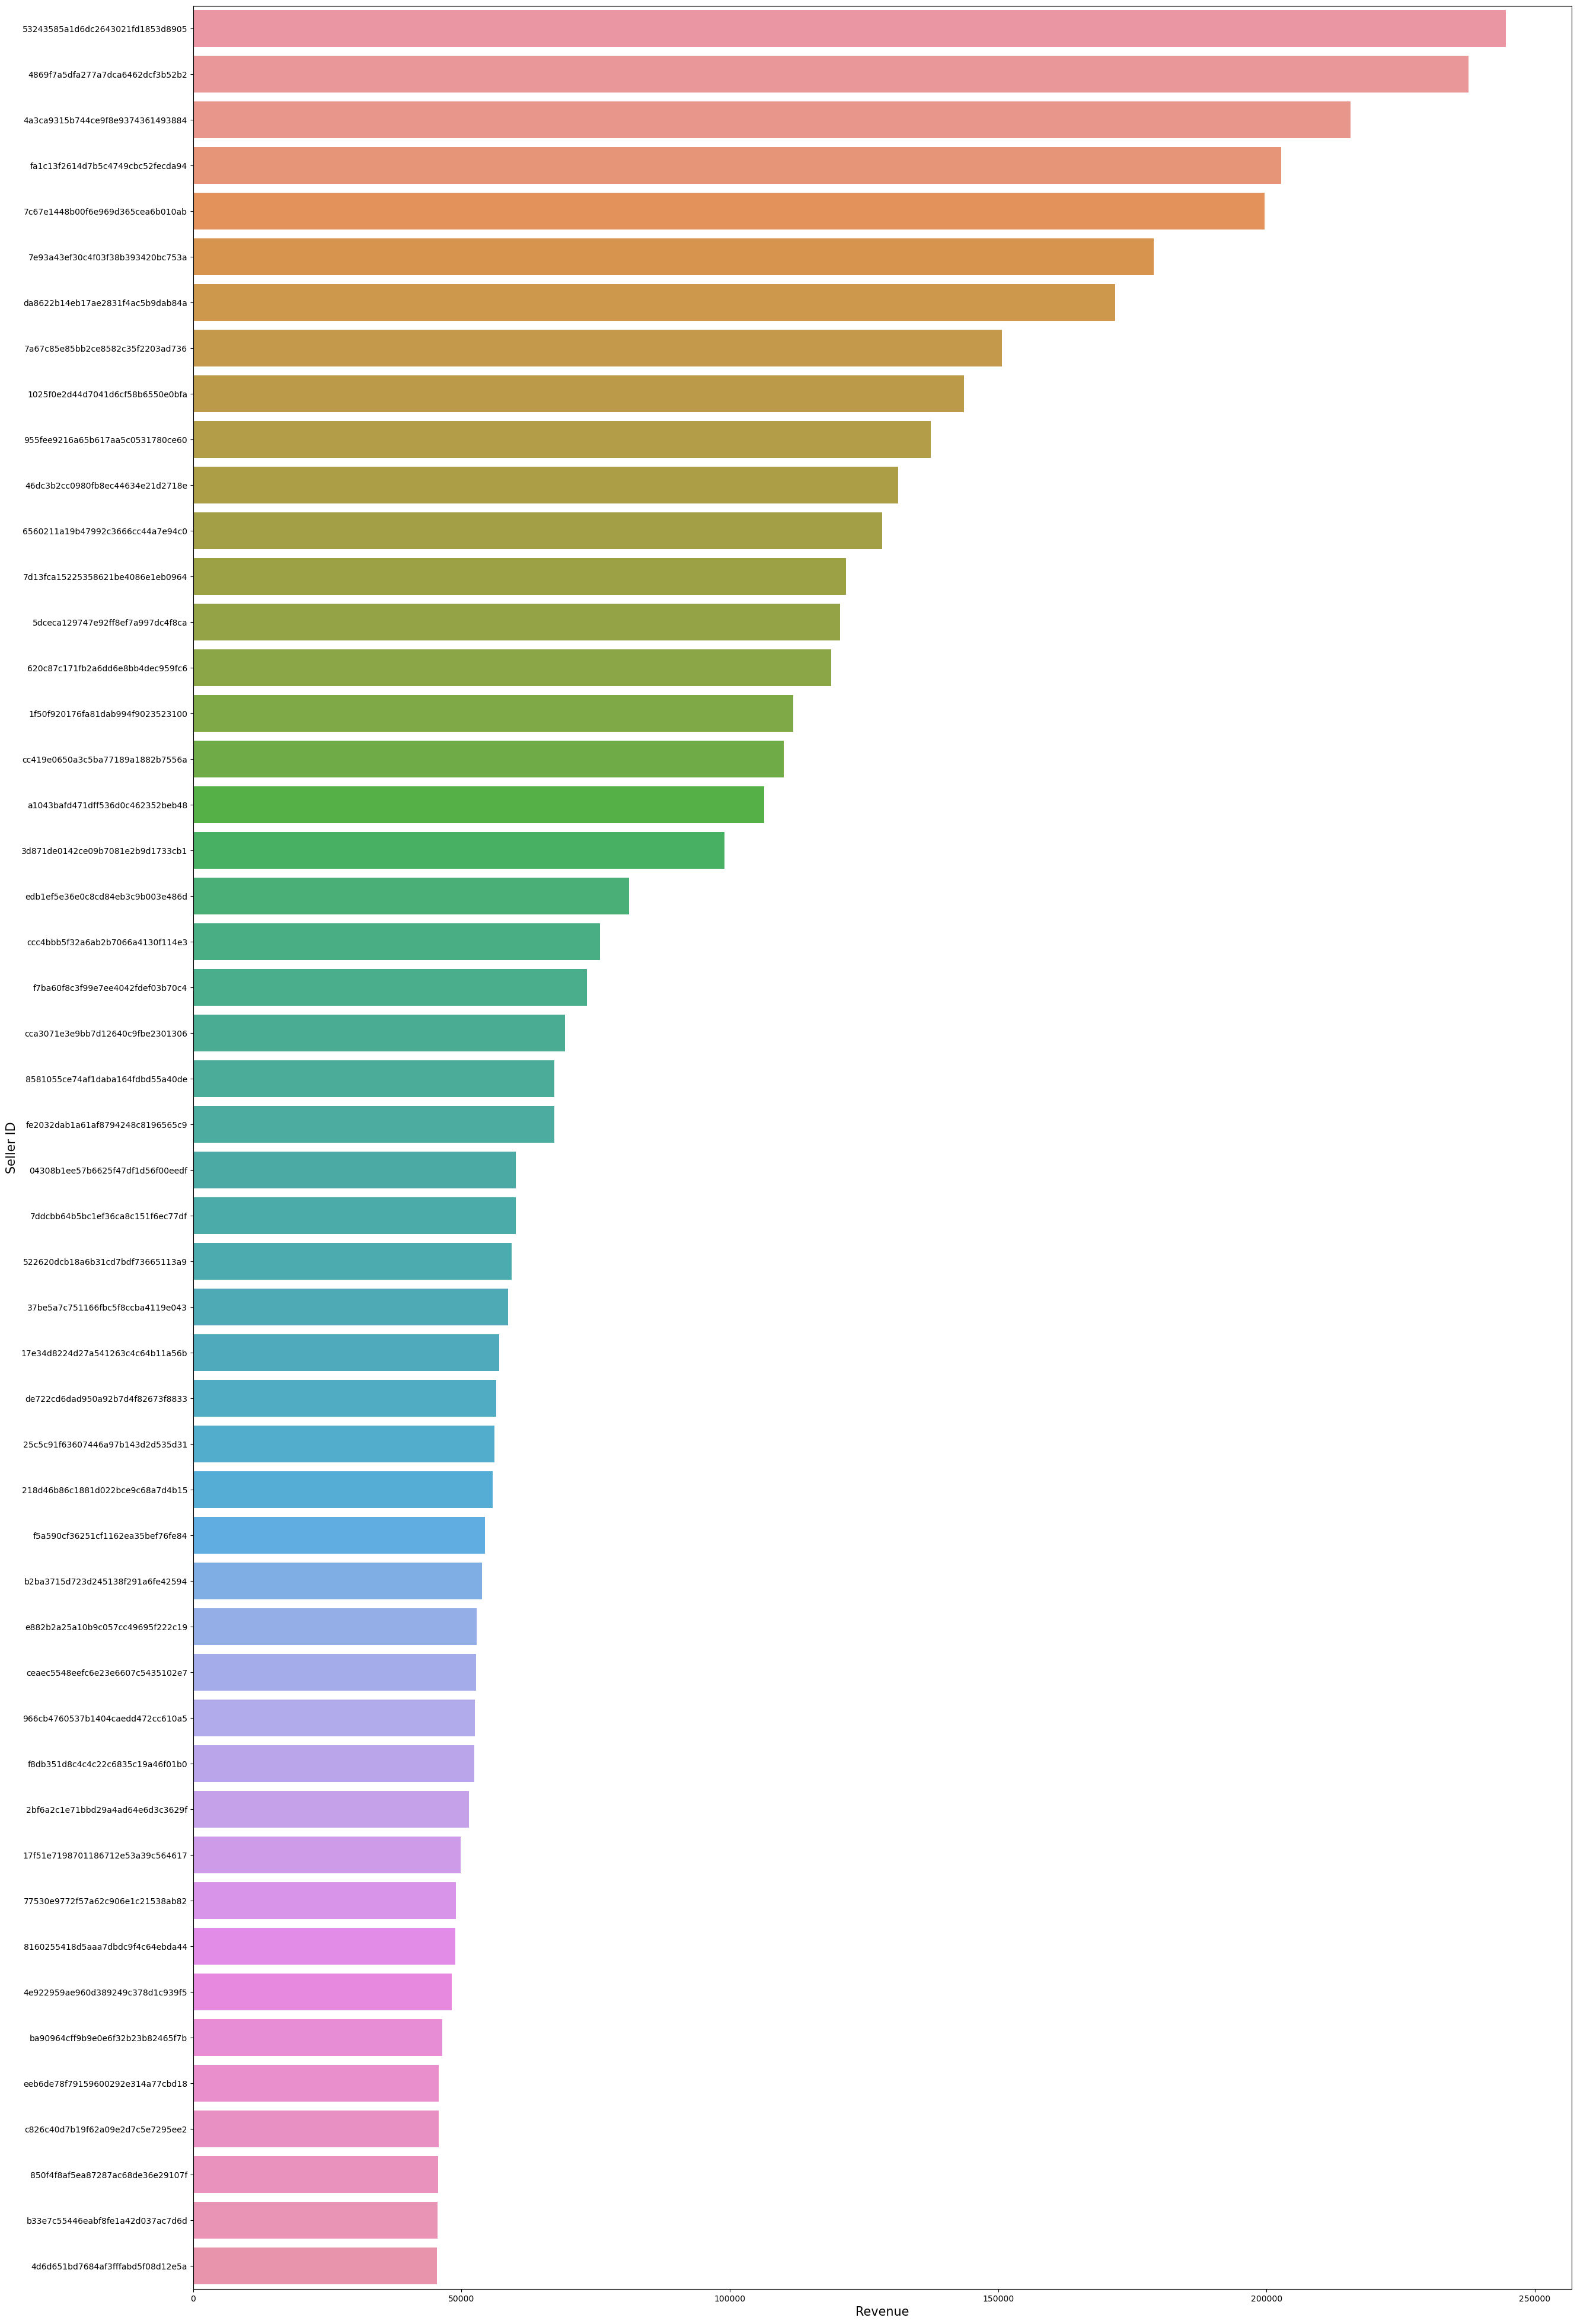

In [ ]:
plt.figure(figsize=(30, 50))
sns.barplot(data=top_total_revenue.head(50), x='price', y='seller_id')
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Seller ID', fontsize = 15)
plt.show()

#### Categories EDA

In [ ]:
seller_cat_dict_top_1 = {}
for i in range(500):
    seller = top_total_revenue['seller_id'][i]
    seller_cat_dict_top_1[seller] = df_all[df_all['seller_id'] == seller].value_counts('product_category_name').index.values

In [ ]:
seller_category_top_df_1 = pd.DataFrame(list(seller_cat_dict_top_1.items()), columns=['seller_id', 'product_categories'])

In [ ]:
seller_category_top_df_1['num_of_categories'] = seller_category_top_df_1['product_categories'].map(lambda x: len(x))

In [ ]:
seller_category_top_df_1

,seller_id,product_categories,num_of_categories
0,53243585a1d6dc2643021fd1853d8905,"[telephony, computers]",2
1,4869f7a5dfa277a7dca6462dcf3b52b2,"[watches_gifts, audio, cool_stuff, health_beau...",10
2,4a3ca9315b744ce9f8e9374361493884,"[bed_bath_table, home_confort, furniture_decor...",7
3,fa1c13f2614d7b5c4749cbc52fecda94,"[watches_gifts, sports_leisure, electronics, a...",5
4,7c67e1448b00f6e969d365cea6b010ab,"[office_furniture, furniture_decor, sports_lei...",6
...,...,...,...
495,670c26e0f1bf8d0576271d5cfaec6d2b,"[sports_leisure, health_beauty]",2
496,6b243f80ed07b10f0e8aa0f21a205f3c,[sports_leisure],1
497,0691148aee60ca47977c187804f935ae,"[sports_leisure, auto, health_beauty, statione...",6
498,2c9e548be18521d1c43cde1c582c6de8,"[stationery, toys, signaling_and_security, aut...",5


In [ ]:
df_seller_cat = df_all[['product_category_name', 'seller_id']].drop_duplicates()

In [ ]:
top_num_sellers_1 = pd.DataFrame(df_seller_cat[df_seller_cat['seller_id'].isin(top_total_revenue['seller_id'])].groupby('product_category_name', as_index=False)['seller_id'].count()).sort_values('seller_id', ascending=False)

In [ ]:
top_num_sellers_1.head()

,product_category_name,seller_id
64,sports_leisure,125
18,cool_stuff,118
40,health_beauty,115
46,housewares,100
4,auto,93


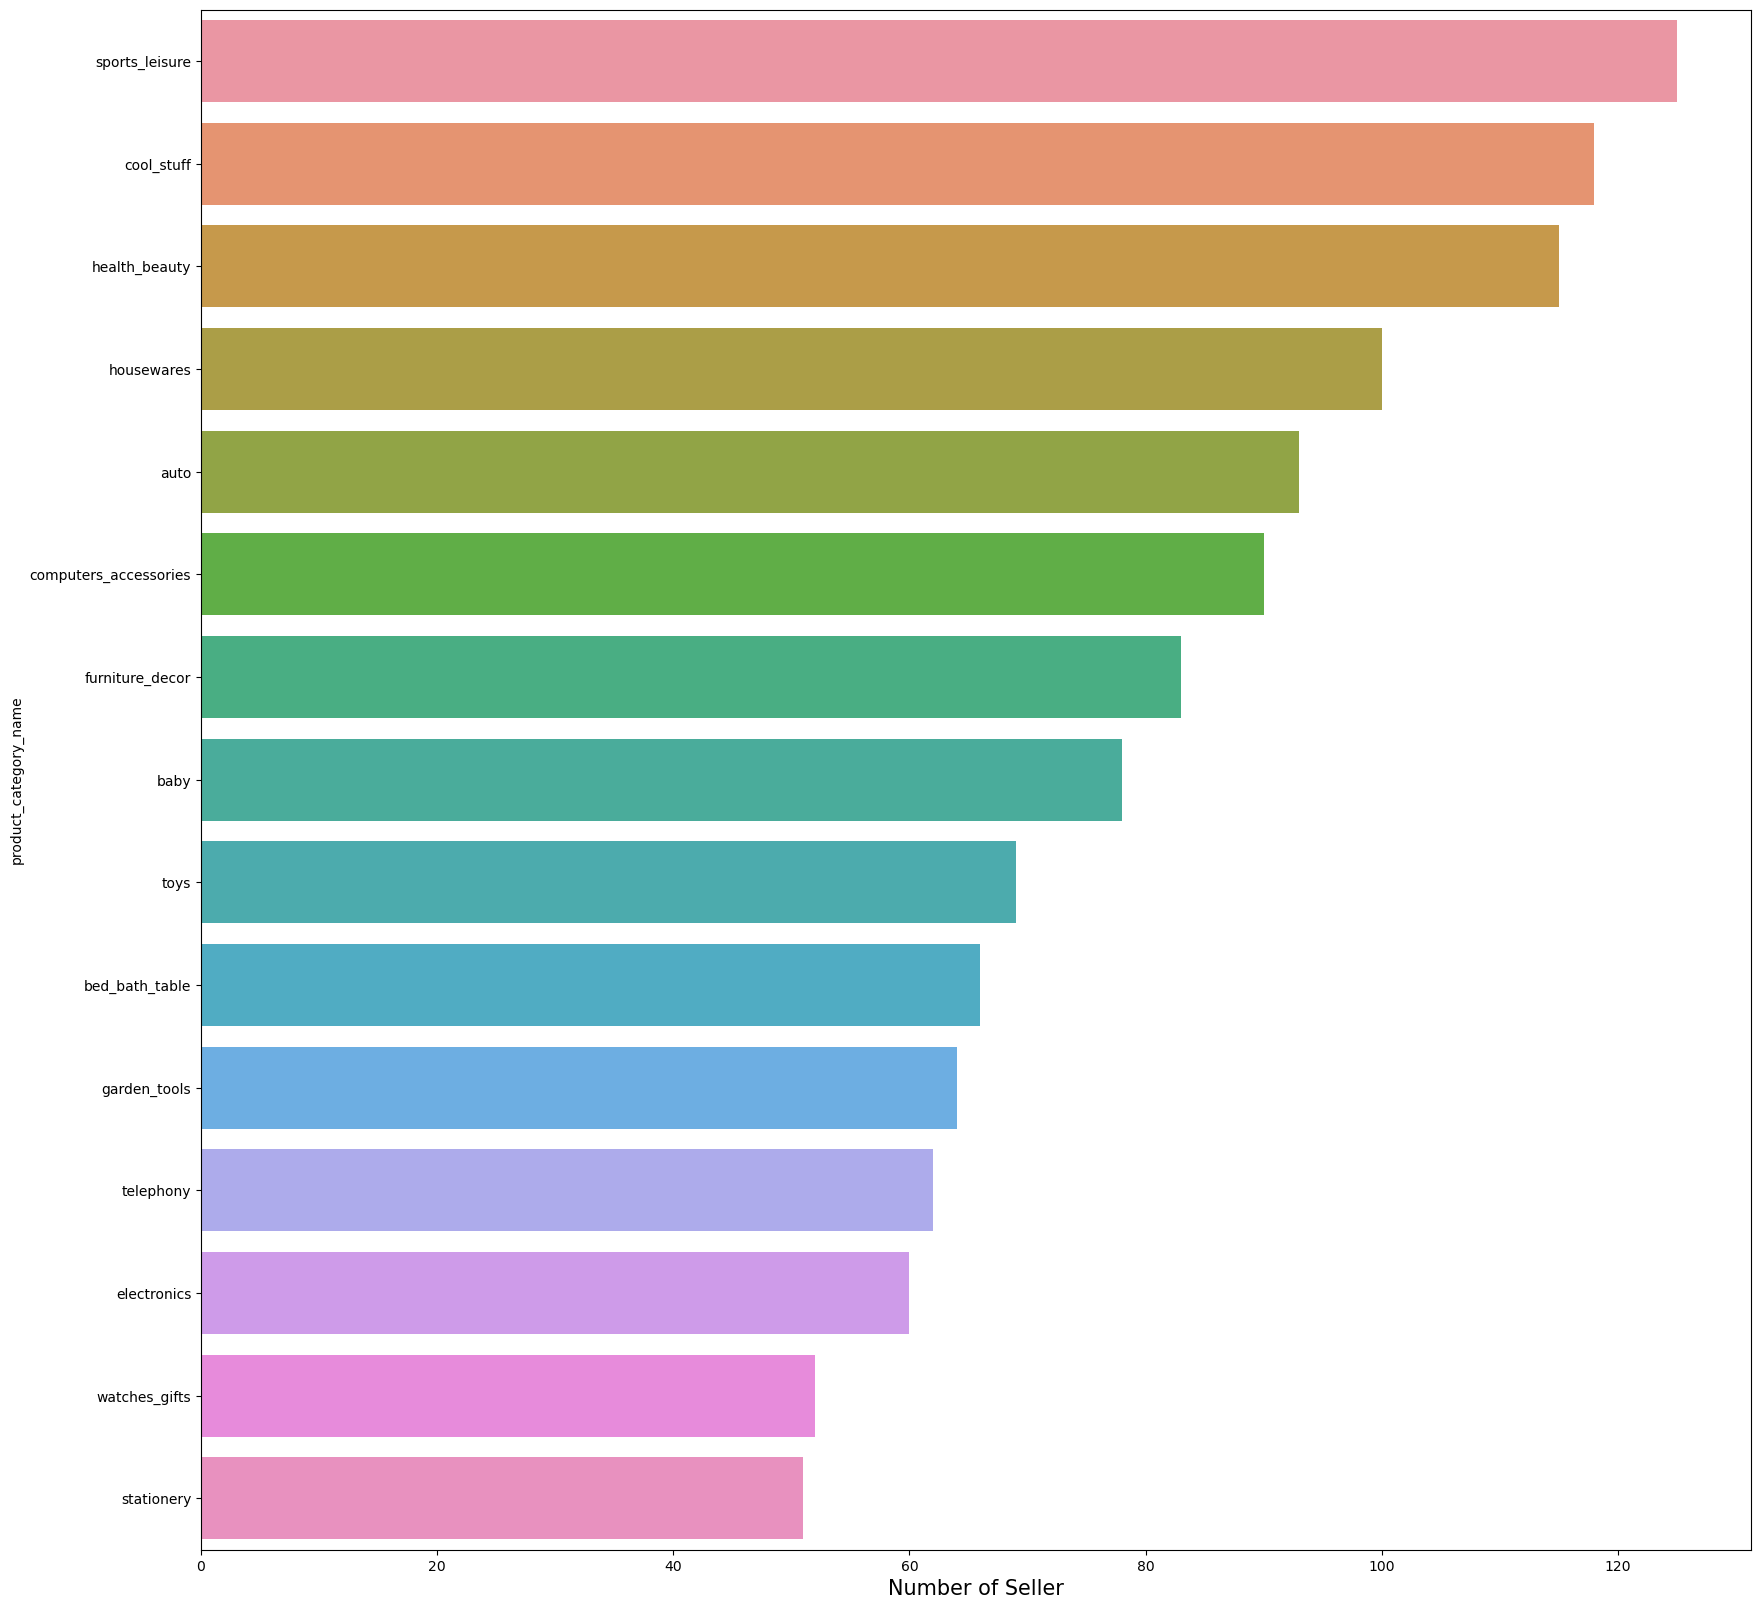

In [ ]:
plt.figure(figsize=(20, 20))
sns.barplot(data=top_num_sellers_1.head(15), x='seller_id', y='product_category_name')
plt.xlabel('Product Categories', fontsize = 15)
plt.xlabel('Number of Seller', fontsize = 15)
plt.show()

### bottom 500

#### General EDA

In [ ]:
bottom_total_revenue = df_total_revenue.tail(500)

In [ ]:
bottom_total_revenue = bottom_total_revenue.reset_index(drop=True)

In [ ]:
bottom_total_revenue.max(), bottom_total_revenue.min()

(seller_id    ff82e8873fba613f2261a9acc896fd84
 price                                  133.22
 order_id                                    9
 dtype: object,
 seller_id    003554e2dce176b5555353e4f3555ac8
 price                                     3.5
 order_id                                    1
 dtype: object)

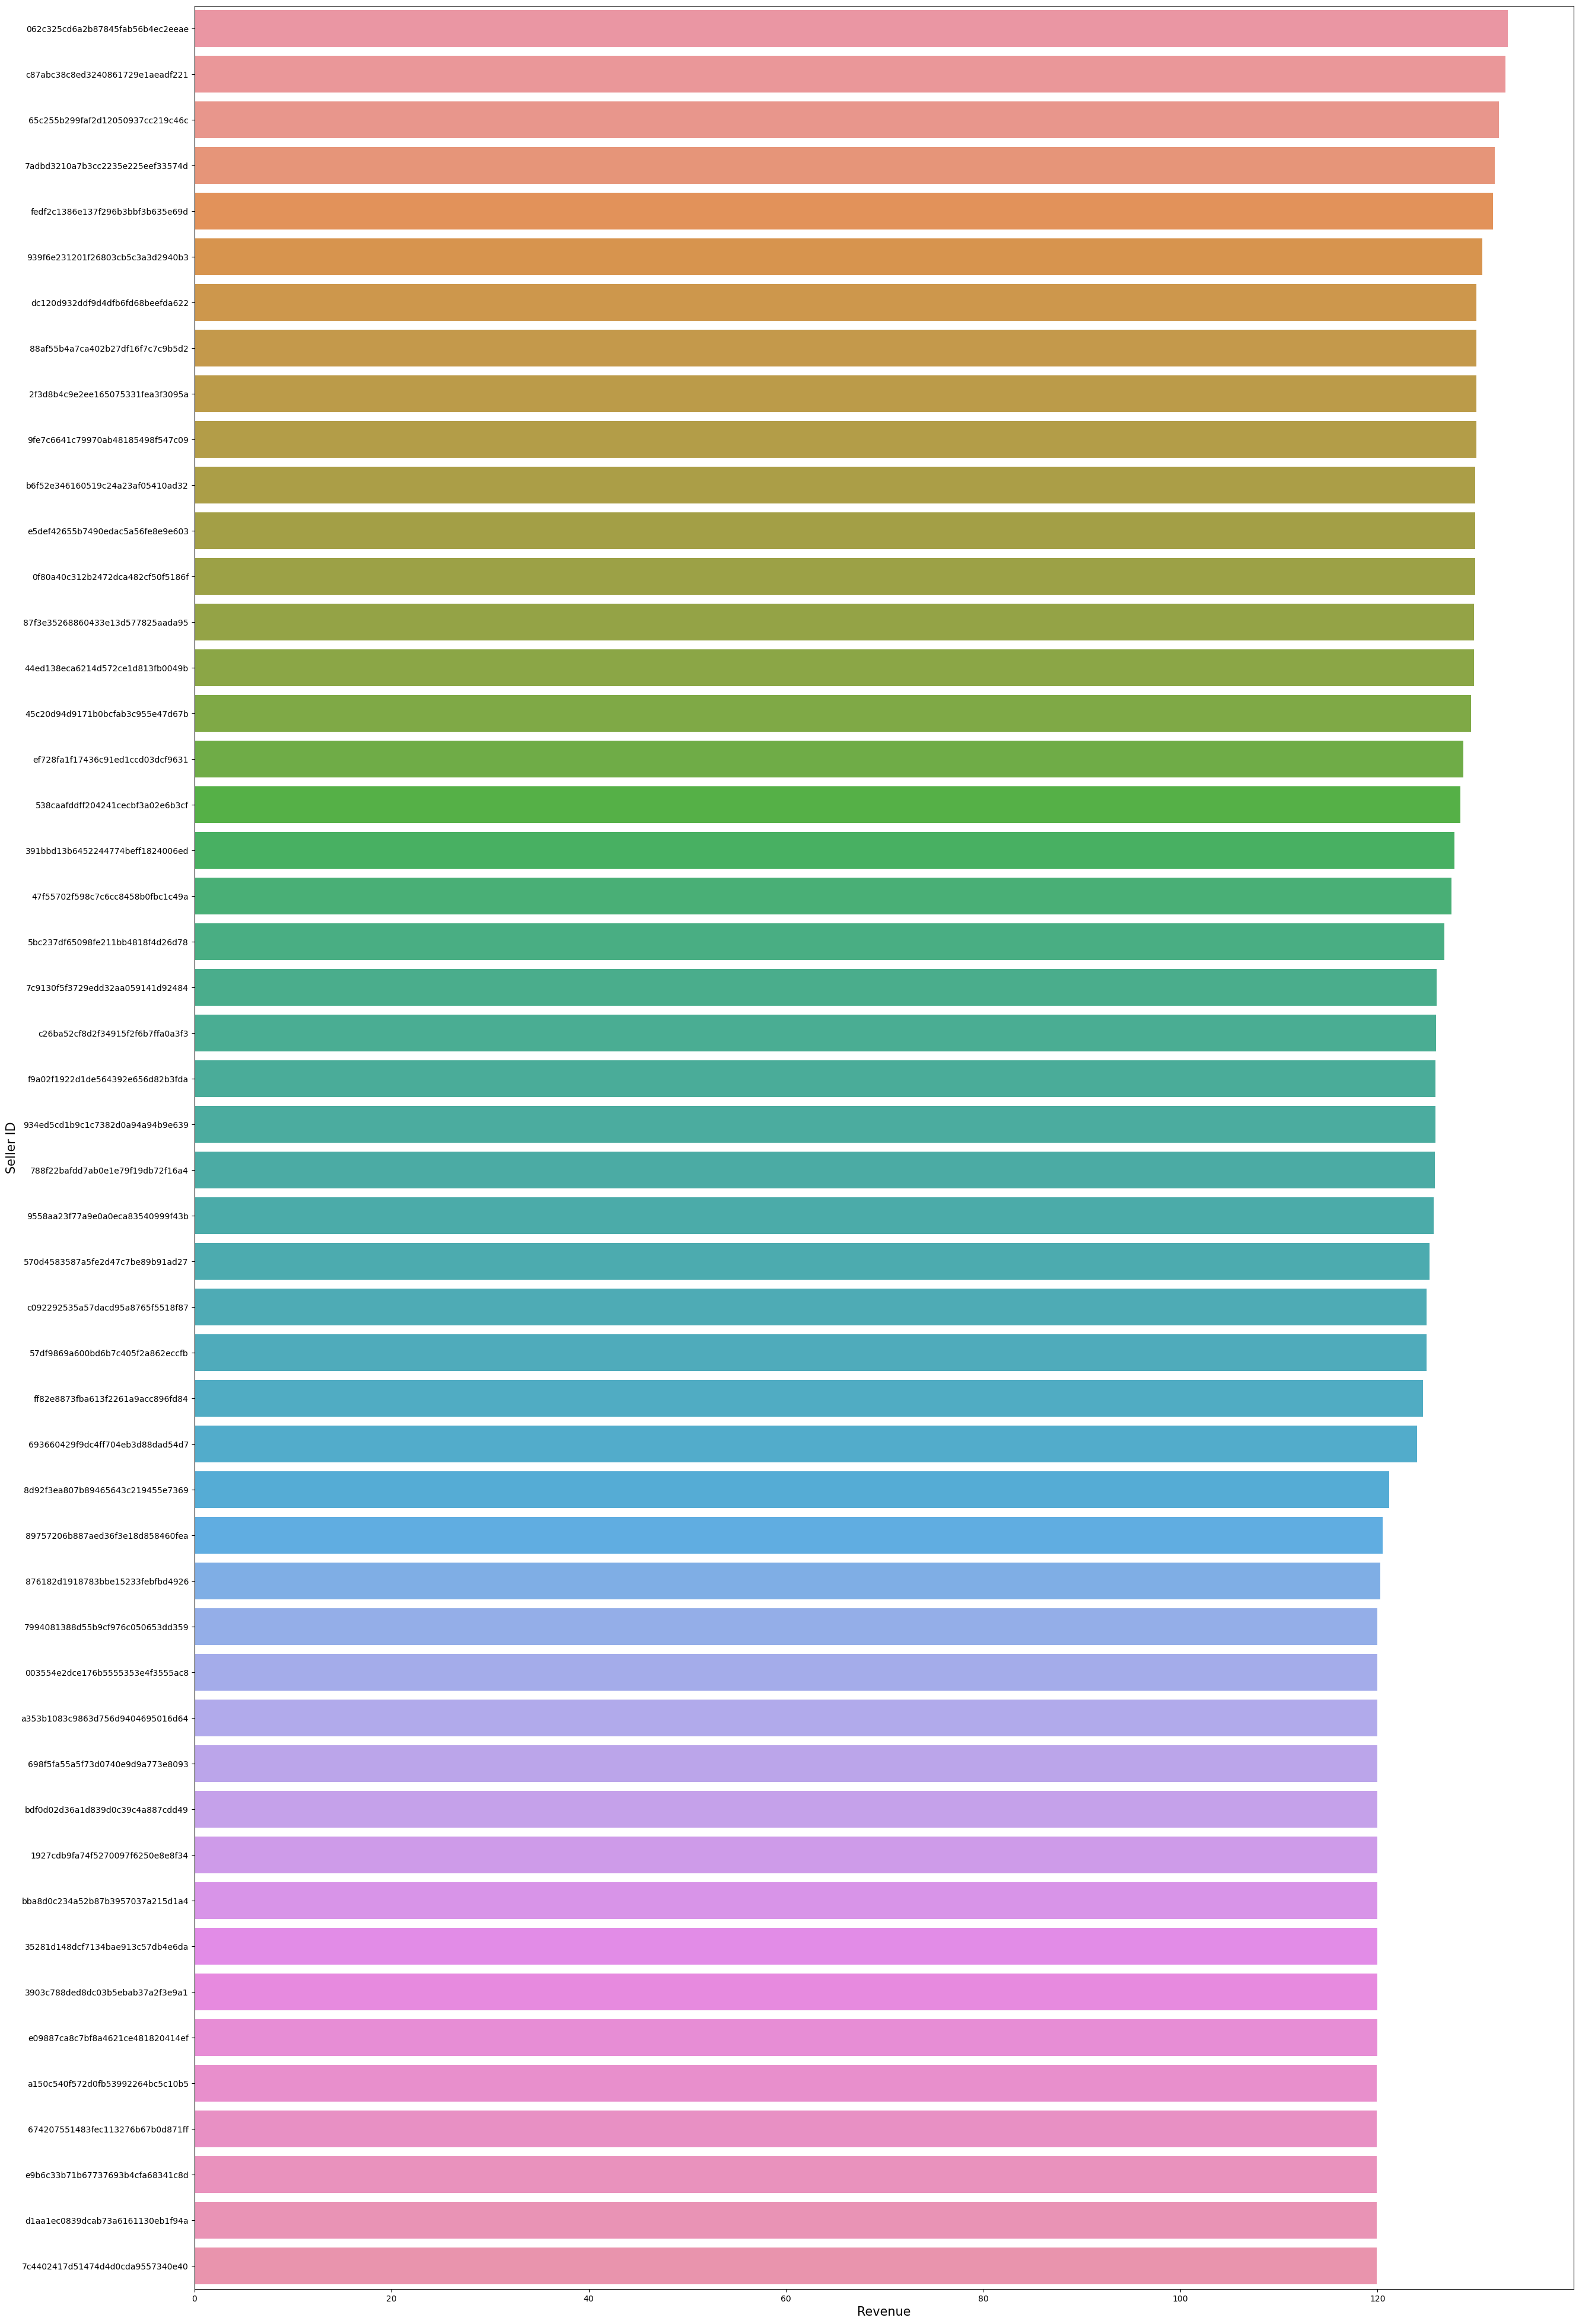

In [ ]:
plt.figure(figsize=(30, 50))
sns.barplot(data=bottom_total_revenue.head(50), x='price', y='seller_id')
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Seller ID', fontsize = 15)
plt.show()

#### Categories EDA

In [ ]:
seller_cat_dict_bottom_1 = {}
for i in range(500):
    seller = bottom_total_revenue['seller_id'][i]
    seller_cat_dict_bottom_1[seller] = df_all[df_all['seller_id'] == seller].value_counts('product_category_name').index.values

In [ ]:
seller_category_bottom_df_1 = pd.DataFrame(list(seller_cat_dict_bottom_1.items()), columns=['seller_id', 'product_categories'])

In [ ]:
seller_category_bottom_df_1['num_of_categories'] = seller_category_bottom_df_1['product_categories'].map(lambda x: len(x))

In [ ]:
seller_category_bottom_df_1

,seller_id,product_categories,num_of_categories
0,062c325cd6a2b87845fab56b4ec2eeae,"[baby, stationery]",2
1,c87abc38c8ed3240861729e1aeadf221,[fashion_bags_accessories],1
2,65c255b299faf2d12050937cc219c46c,[perfumery],1
3,7adbd3210a7b3cc2235e225eef33574d,[housewares],1
4,fedf2c1386e137f296b3bbf3b635e69d,"[home_construction, construction_tools_lights]",2
...,...,...,...
495,ad14615bdd492b01b0d97922e87cb87f,[auto],1
496,702835e4b785b67a084280efca355756,[],0
497,1fa2d3def6adfa70e58c276bb64fe5bb,[housewares],1
498,77128dec4bec4878c37ab7d6169d6f26,[food_drink],1


In [ ]:
bottom_num_sellers_1 = pd.DataFrame(df_seller_cat[df_seller_cat['seller_id'].isin(bottom_total_revenue['seller_id'])].groupby('product_category_name', as_index=False)['seller_id'].count()).sort_values('seller_id', ascending=False)

In [ ]:
bottom_num_sellers_1.head()

,product_category_name,seller_id
31,health_beauty,64
36,housewares,50
45,sports_leisure,45
28,furniture_decor,37
3,auto,37


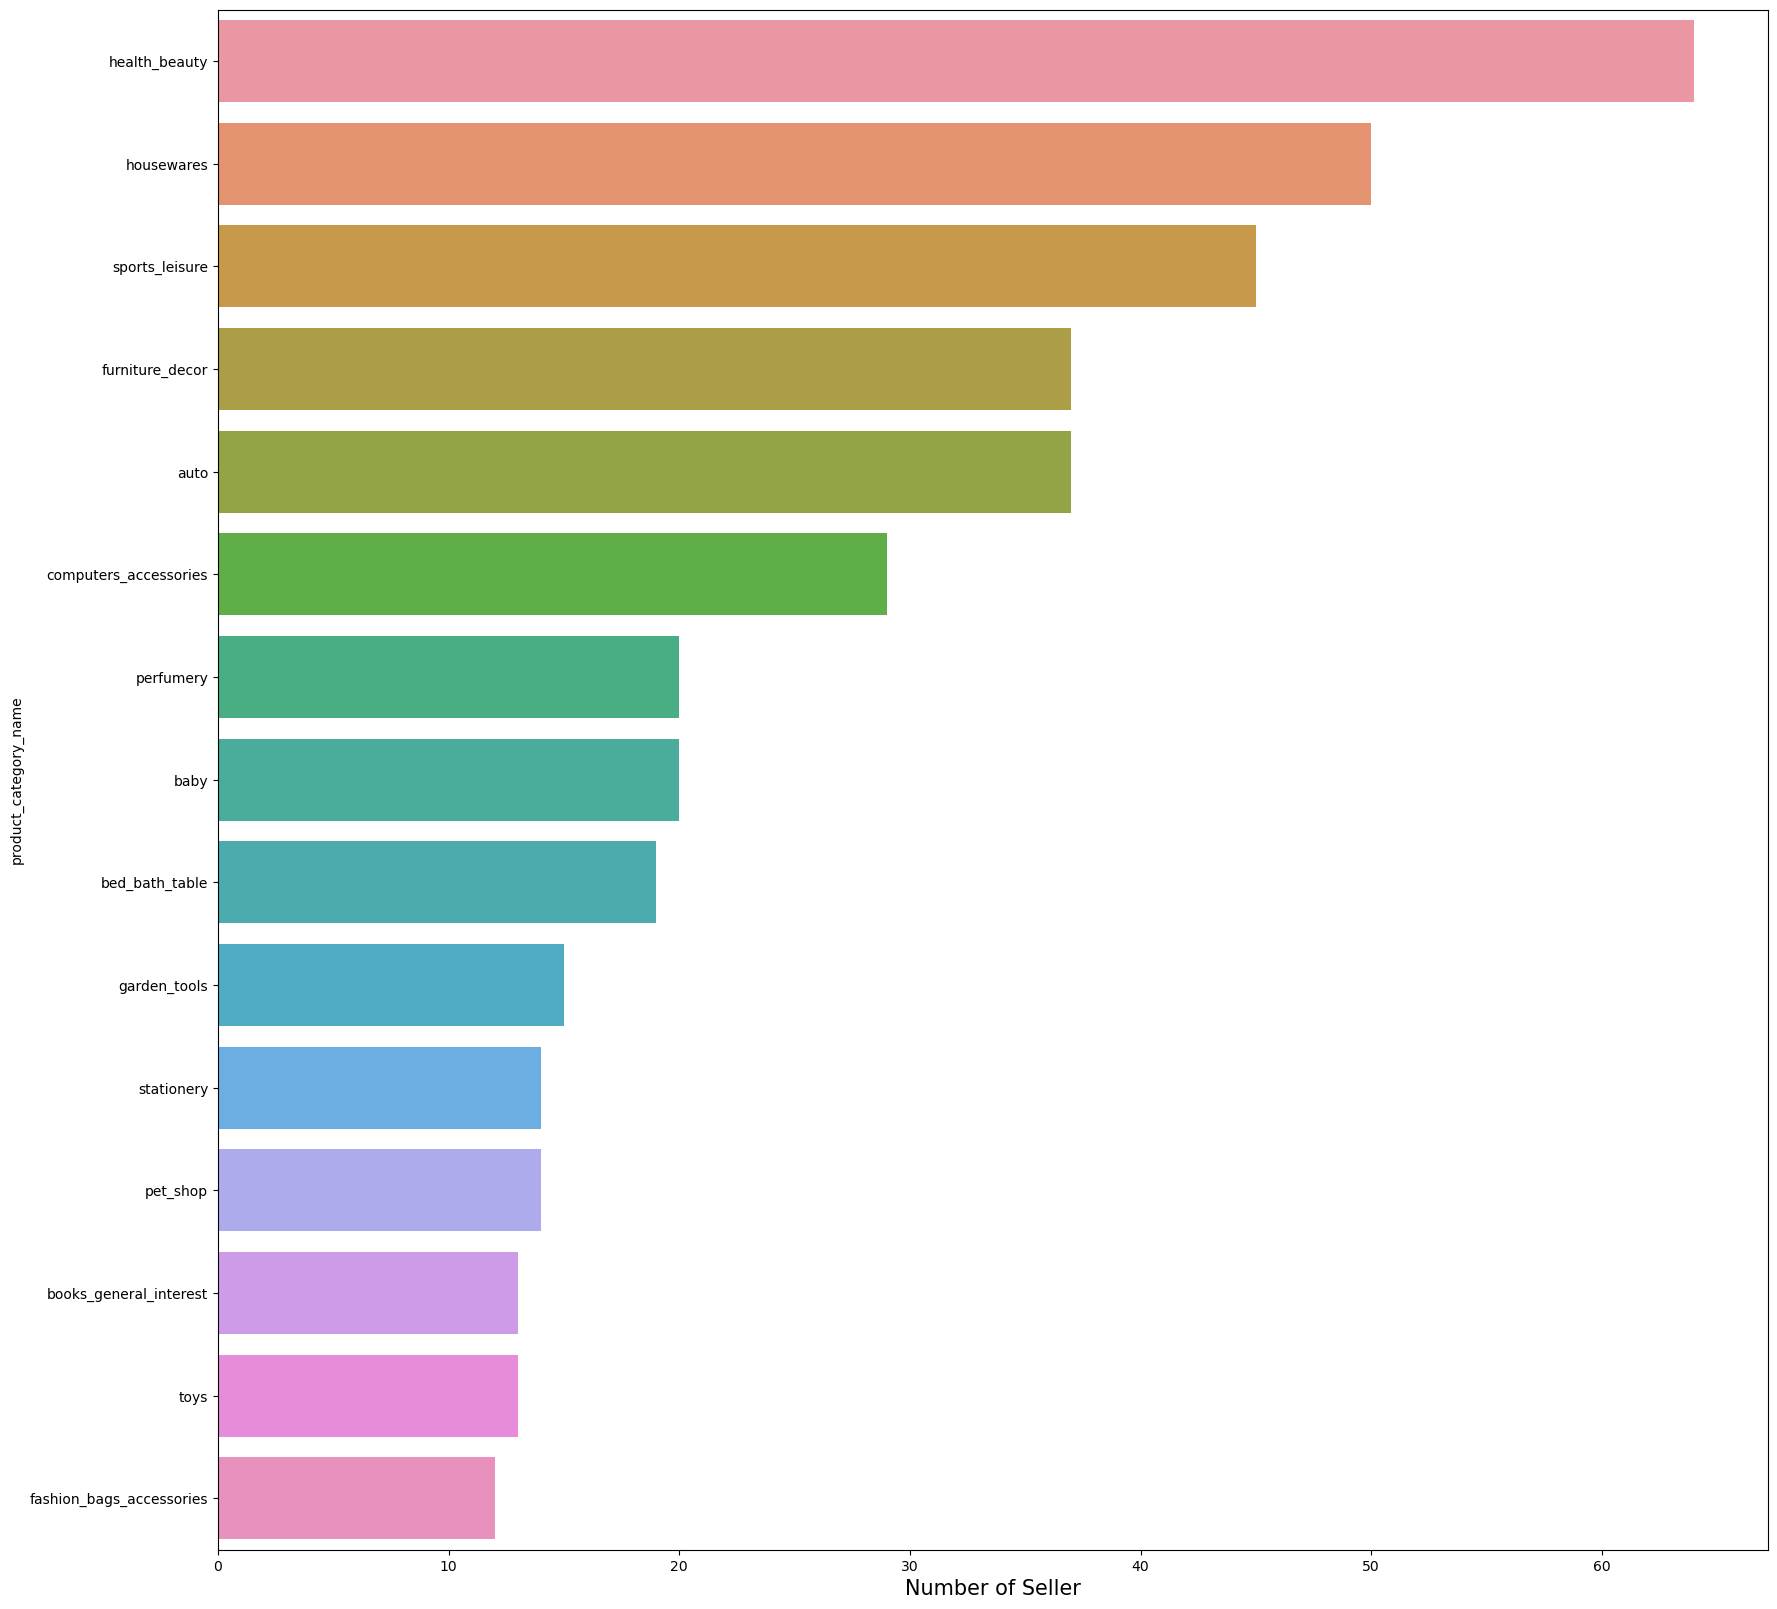

In [ ]:
plt.figure(figsize=(20, 20))
sns.barplot(data=bottom_num_sellers_1.head(15), x='seller_id', y='product_category_name')
plt.xlabel('Product Categories', fontsize = 15)
plt.xlabel('Number of Seller', fontsize = 15)
plt.show()

### top vs. bottom

#### Average Price 

In [ ]:
top_avg_revenue_1 = top_total_revenue['price'].sum() / 500
top_avg_revenue_1

22227.403140000002

In [ ]:
top_avg_num_order_1 = top_total_revenue['order_id'].sum() / 500
top_avg_num_order_1

168.714

In [ ]:
top_avg_price_1 = top_avg_revenue_1 / top_avg_num_order_1
top_avg_price_1

131.7460503574096

In [ ]:
bottom_avg_revenue_1 = bottom_total_revenue['price'].sum() / 500
bottom_avg_revenue_1

68.85292

In [ ]:
bottom_avg_num_order_1 = bottom_total_revenue['order_id'].sum() / 500
bottom_avg_num_order_1

1.788

In [ ]:
bottom_avg_price_1 = bottom_avg_revenue_1 / bottom_avg_num_order_1
bottom_avg_price_1

38.50834451901566

In [ ]:
# top seller 와 bottom seller들의 평균 카테고리수 비교 시각화
top_bottom_price_1 = pd.DataFrame({'top_bottom' : ['top_seller_avg', 'bottom_seller_avg'], 'average' : [top_avg_price_1, bottom_avg_price_1]})
top_bottom_price_1

,top_bottom,average
0,top_seller_avg,131.746050
1,bottom_seller_avg,38.508345


<AxesSubplot:xlabel='top_bottom', ylabel='average'>

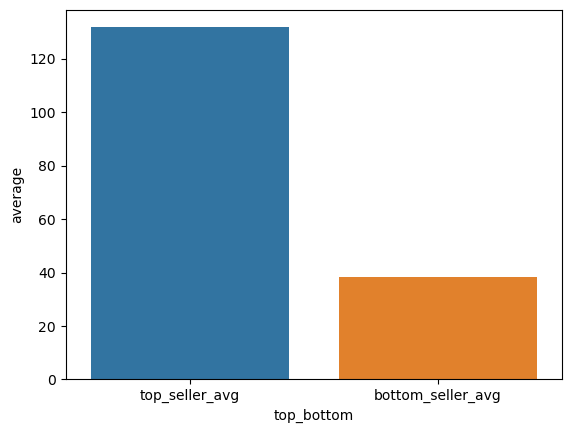

In [ ]:
sns.barplot(data=top_bottom_price_1, x='top_bottom', y='average')

#### Average Number of Categories

In [ ]:
top_avg_1 = seller_category_top_df_1['num_of_categories'].sum() / 500
top_avg_1

3.784

In [ ]:
bottom_avg_1 = seller_category_bottom_df_1['num_of_categories'].sum() / 500
bottom_avg_1

1.024

In [ ]:
# top seller 와 bottom seller들의 평균 카테고리수 비교 시각화
top_bottom_1 = pd.DataFrame({'top_bottom' : ['top_seller_avg', 'bottom_seller_avg'], 'average' : [top_avg_1, bottom_avg_1]})
top_bottom_1

,top_bottom,average
0,top_seller_avg,3.784
1,bottom_seller_avg,1.024


<AxesSubplot:xlabel='top_bottom', ylabel='average'>

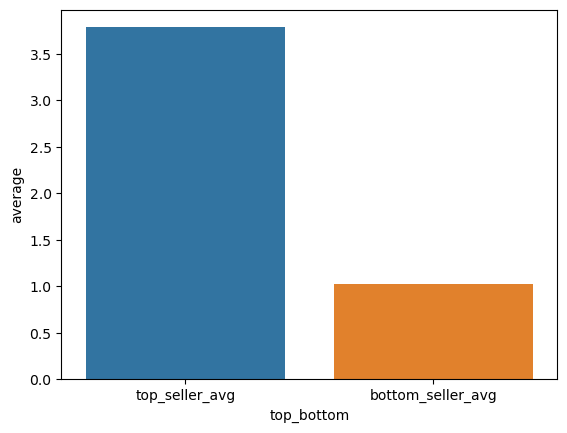

In [ ]:
sns.barplot(data=top_bottom_1, x='top_bottom', y='average')

## 판매건수 기준

In [ ]:
df_num_order = pd.DataFrame(df_all.groupby('seller_id', as_index=False).agg({'price' : 'sum', 'order_id' : 'count'})).sort_values('order_id', ascending=False)

### top 500

#### General EDA

In [ ]:
top_num_order = df_num_order.head(500)
top_num_order

,seller_id,price,order_id
873,4a3ca9315b744ce9f8e9374361493884,215678.97,2153
1220,6560211a19b47992c3666cc44a7e94c0,128352.81,2122
366,1f50f920176fa81dab994f9023523100,111828.21,2015
2452,cc419e0650a3c5ba77189a1882b7556a,110082.37,1883
2613,da8622b14eb17ae2831f4ac5b9dab84a,171784.57,1662
...,...,...,...
460,2709af9587499e95e803a6498a5a56e9,1288.96,48
2063,ad420dd0c4f92f8af951ac24b86d0cf5,4755.28,47
2287,c013e57c075a06e5b5c48ee03c525719,2052.53,47
1060,57c764b4a836300be881e2ff86e449f9,2454.30,47


In [ ]:
top_num_order = top_num_order.reset_index(drop=True)

In [ ]:
top_num_order.max(), top_num_order.min()

(seller_id    fffd5413c0700ac820c7069d66d98c89
 price                               244627.55
 order_id                                 2153
 dtype: object,
 seller_id    001cca7ae9ae17fb1caed9dfb1094831
 price                                  873.37
 order_id                                   47
 dtype: object)

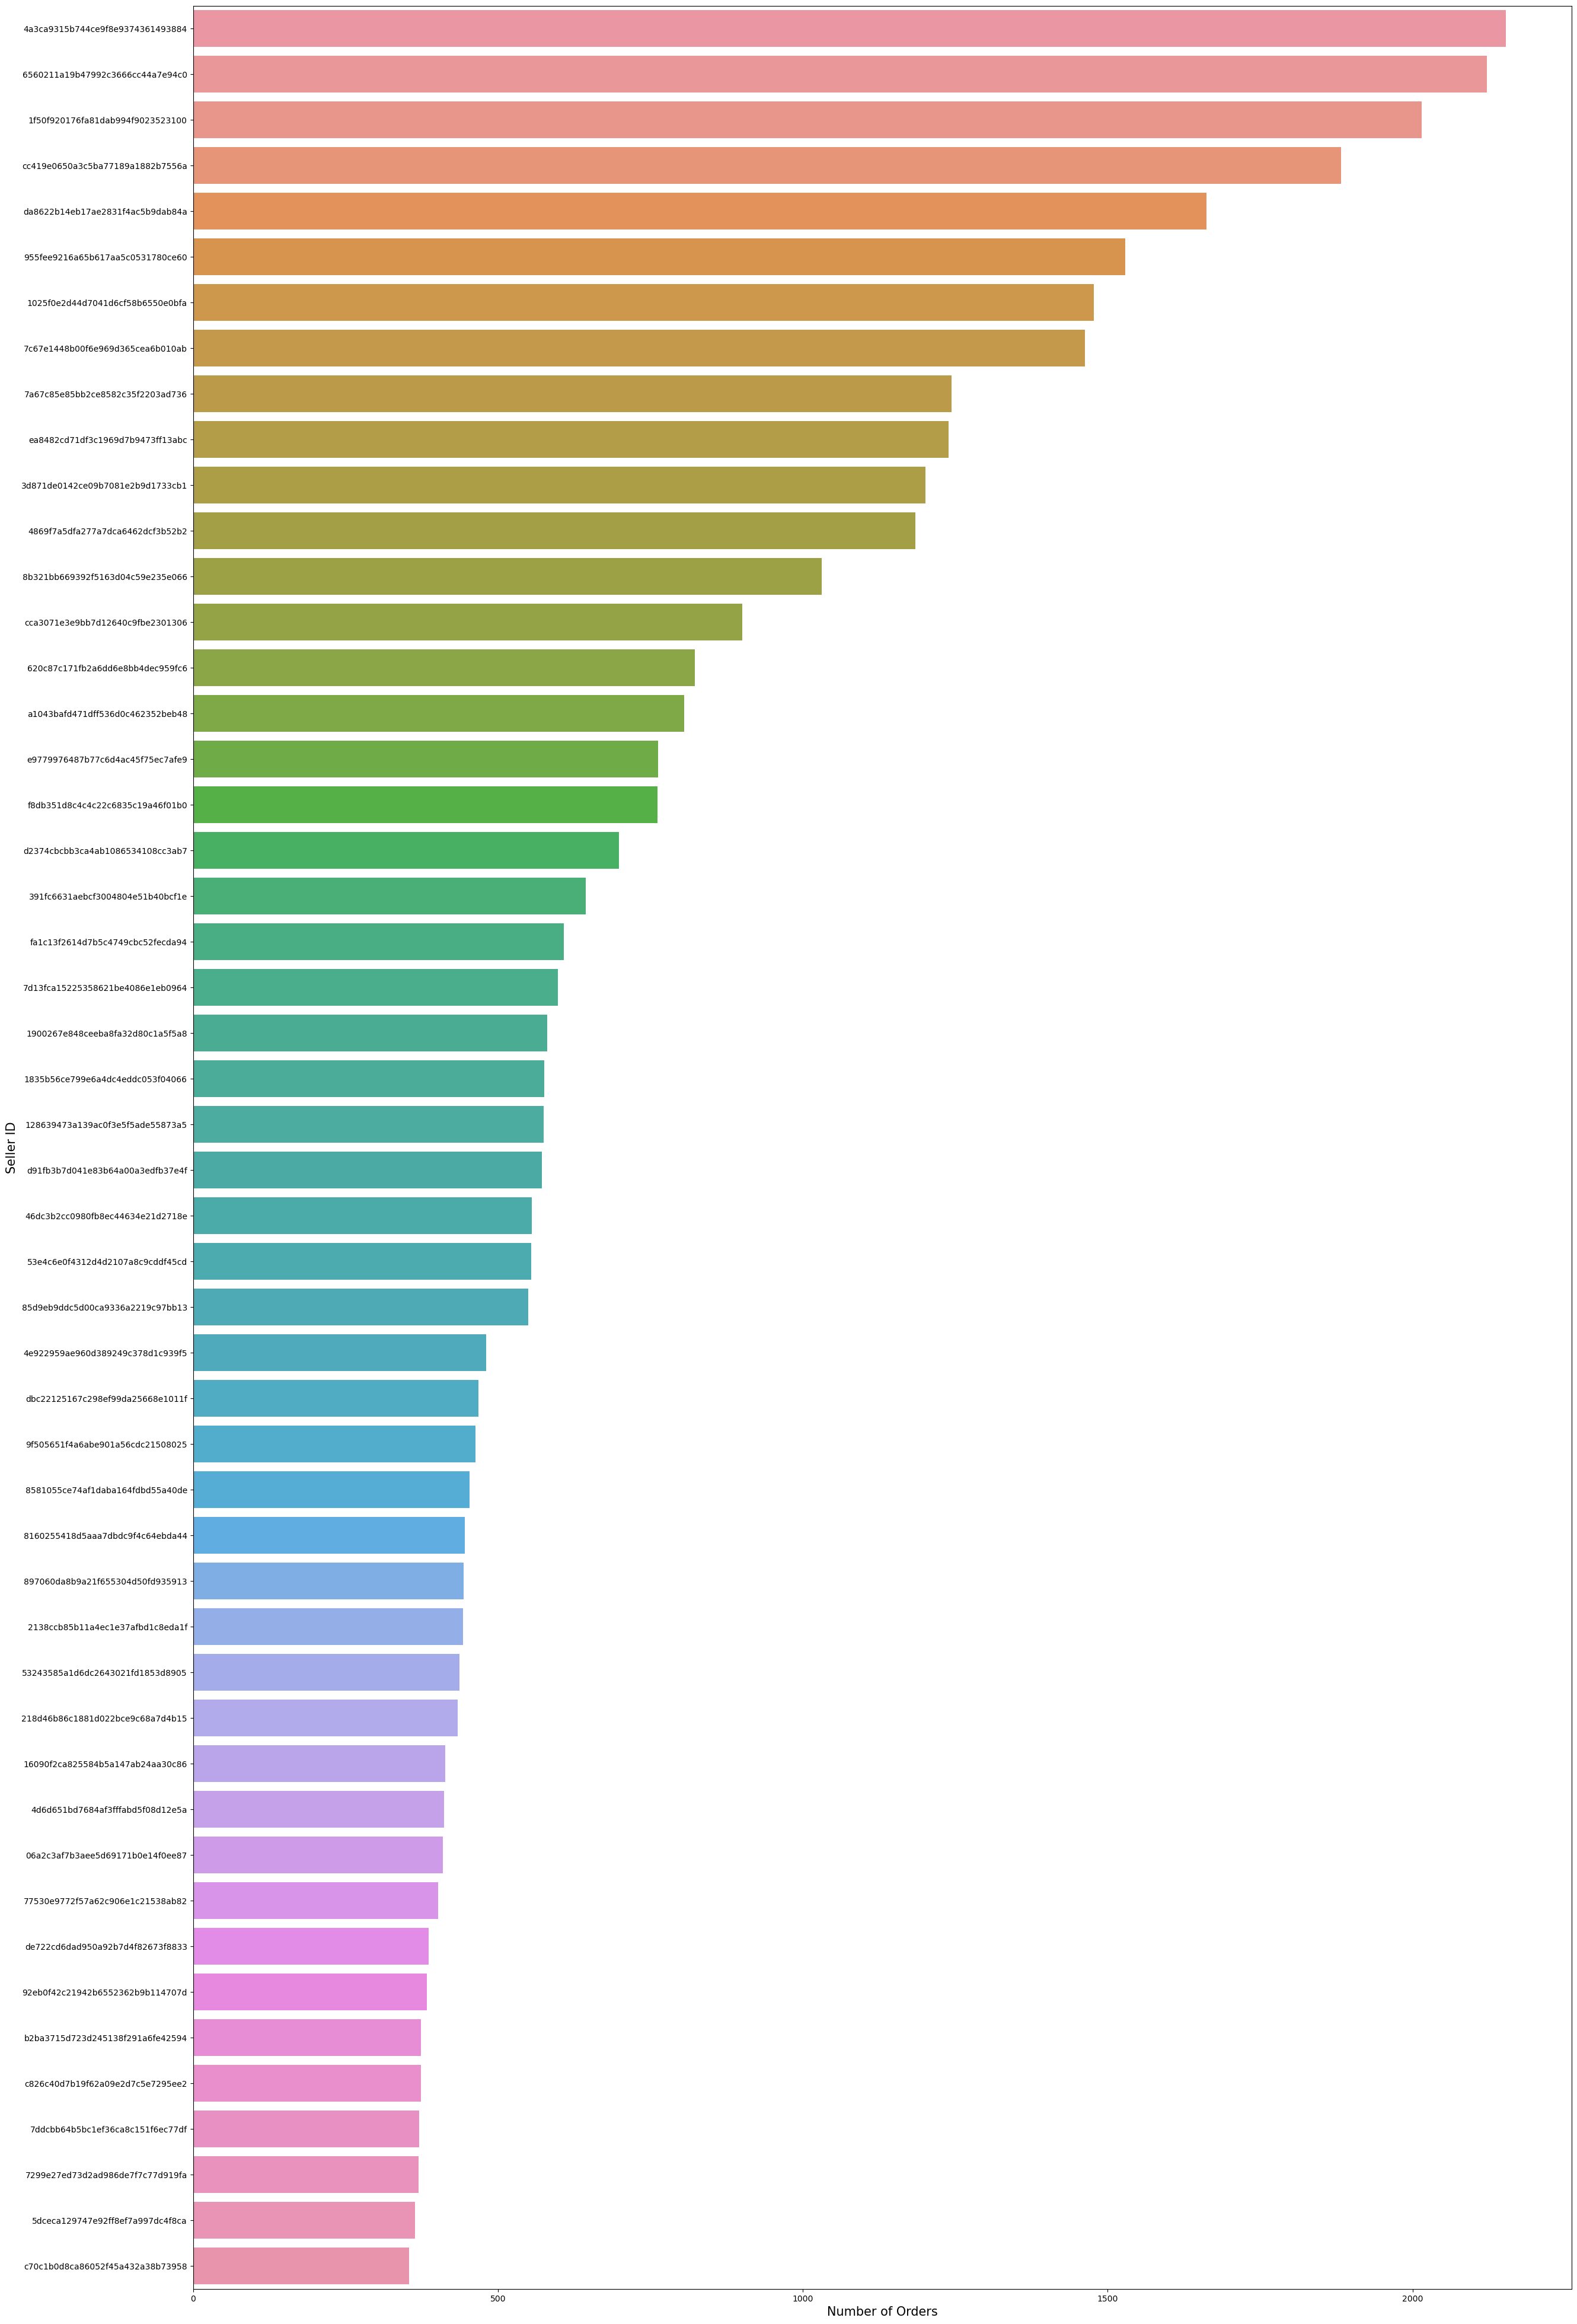

In [ ]:
plt.figure(figsize=(30, 50))
sns.barplot(data=top_num_order.head(50), x='order_id', y='seller_id')
plt.xlabel('Number of Orders', fontsize = 15)
plt.ylabel('Seller ID', fontsize = 15)
plt.show()

#### Categories EDA

In [ ]:
seller_cat_dict_top_2 = {}
for i in range(500):
    seller = top_num_order['seller_id'][i]
    seller_cat_dict_top_2[seller] = df_all[df_all['seller_id'] == seller].value_counts('product_category_name').index.values

In [ ]:
seller_category_top_df_2 = pd.DataFrame(list(seller_cat_dict_top_2.items()), columns=['seller_id', 'product_categories'])

In [ ]:
seller_category_top_df_2['num_of_categories'] = seller_category_top_df_2['product_categories'].map(lambda x: len(x))

In [ ]:
seller_category_top_df_2

,seller_id,product_categories,num_of_categories
0,4a3ca9315b744ce9f8e9374361493884,"[bed_bath_table, home_confort, furniture_decor...",7
1,6560211a19b47992c3666cc44a7e94c0,"[watches_gifts, fashion_bags_accessories, audi...",7
2,1f50f920176fa81dab994f9023523100,"[garden_tools, baby, signaling_and_security]",3
3,cc419e0650a3c5ba77189a1882b7556a,"[health_beauty, perfumery, telephony, food]",4
4,da8622b14eb17ae2831f4ac5b9dab84a,"[bed_bath_table, health_beauty, cool_stuff, fu...",4
...,...,...,...
495,2709af9587499e95e803a6498a5a56e9,"[health_beauty, perfumery]",2
496,ad420dd0c4f92f8af951ac24b86d0cf5,"[health_beauty, toys]",2
497,c013e57c075a06e5b5c48ee03c525719,[pet_shop],1
498,57c764b4a836300be881e2ff86e449f9,"[housewares, cool_stuff, furniture_decor, gard...",4


In [ ]:
top_num_sellers_2 = pd.DataFrame(df_seller_cat[df_seller_cat['seller_id'].isin(top_num_order['seller_id'])].groupby('product_category_name', as_index=False)['seller_id'].count()).sort_values('seller_id', ascending=False)

In [ ]:
top_num_sellers_2.head()

,product_category_name,seller_id
66,sports_leisure,144
43,health_beauty,136
49,housewares,129
39,furniture_decor,114
20,cool_stuff,114


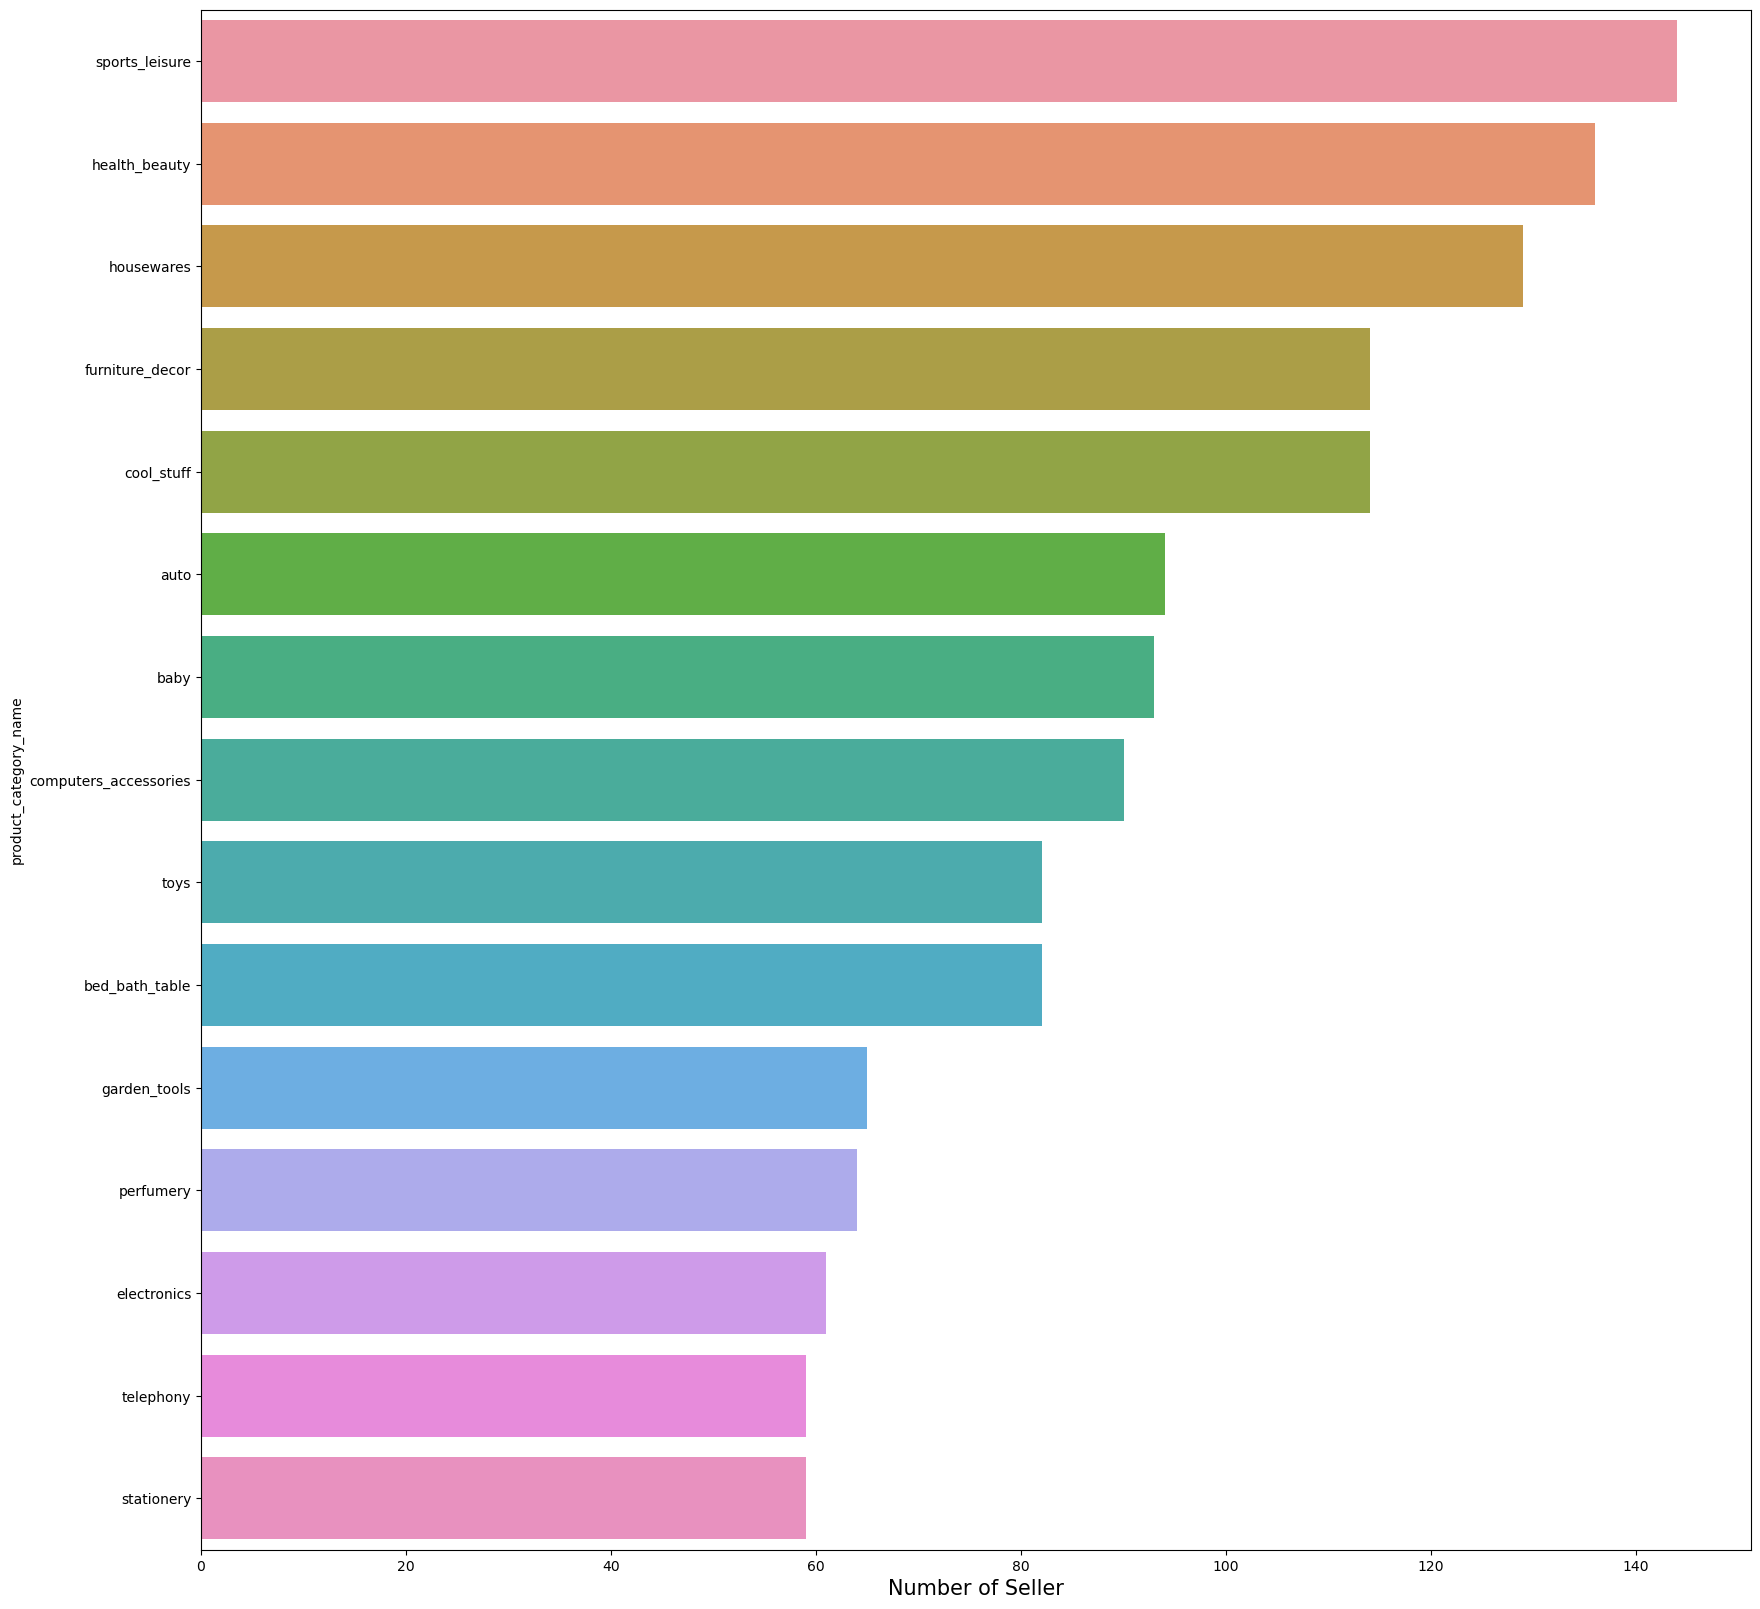

In [ ]:
plt.figure(figsize=(20, 20))
sns.barplot(data=top_num_sellers_2.head(15), x='seller_id', y='product_category_name')
plt.xlabel('Product Categories', fontsize = 15)
plt.xlabel('Number of Seller', fontsize = 15)
plt.show()

### bottom 500

#### General EDA

In [ ]:
bottom_num_order = df_num_order.tail(500)
bottom_num_order

,seller_id,price,order_id
1406,739c7d7be81f63812dea0d1b1451c651,77.50,2
1754,90b57083da5d803237da74daec6dcb2b,206.90,2
2264,be1e9e378700cecaa4ebf71433d7915c,119.89,2
2034,aae5953b9edddf14749c0d65d60eb4b9,173.00,2
1409,73da1880b39c71de2b262bc7720c1494,398.00,2
...,...,...,...
917,4dab98ca6cd6d3df586203cefd28a042,154.90,1
919,4dc2e811a1760953cb7c6a590b498943,175.00,1
921,4ddeb3e828550cddc8d45c8bc36ab2d1,152.00,1
1613,850857dfac77488c307e2b1cbd84ab5a,1599.00,1


In [ ]:
bottom_num_order = bottom_num_order.reset_index(drop=True)

In [ ]:
bottom_num_order.max(), bottom_num_order.min()

(seller_id    fedaedd3ca31d56ab33e92035e4b361c
 price                                  6729.0
 order_id                                    2
 dtype: object,
 seller_id    003554e2dce176b5555353e4f3555ac8
 price                                     3.5
 order_id                                    1
 dtype: object)

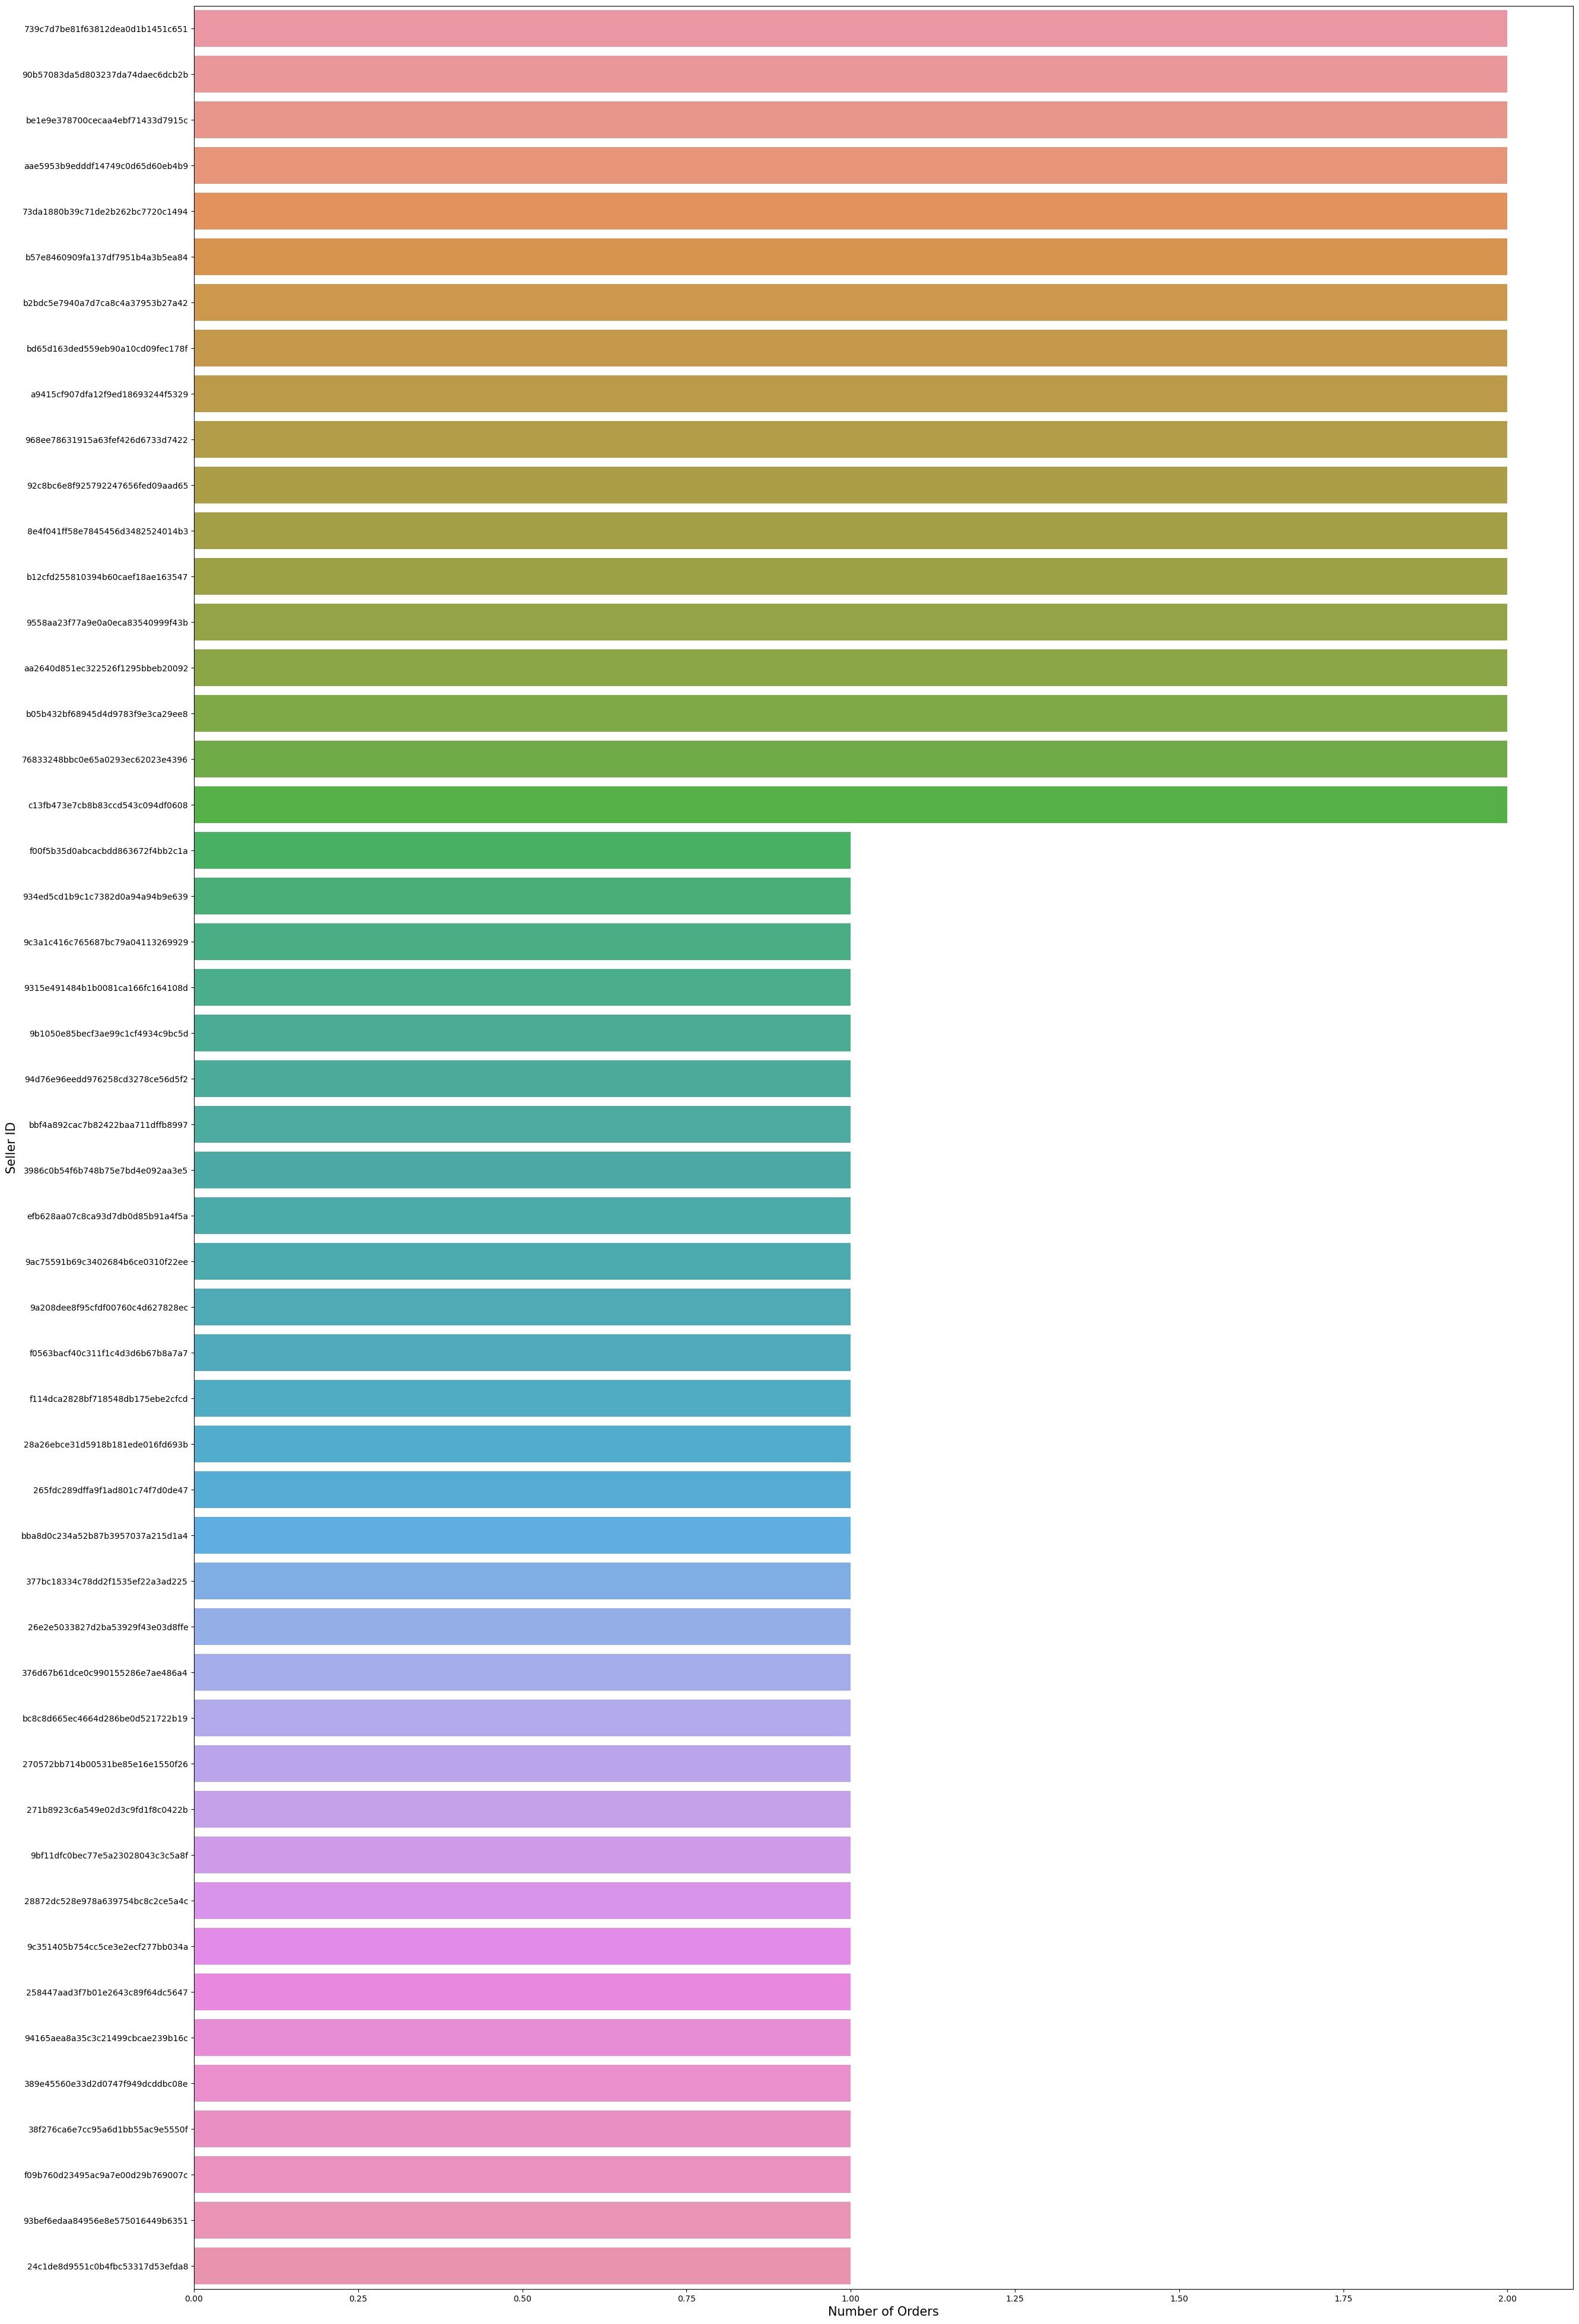

In [ ]:
plt.figure(figsize=(30, 50))
sns.barplot(data=bottom_num_order.head(50), x='order_id', y='seller_id')
plt.xlabel('Number of Orders', fontsize = 15)
plt.ylabel('Seller ID', fontsize = 15)
plt.show()

#### Categories EDA

In [ ]:
seller_cat_dict_bottom_2 = {}
for i in range(500):
    seller = bottom_num_order['seller_id'][i]
    seller_cat_dict_bottom_2[seller] = df_all[df_all['seller_id'] == seller].value_counts('product_category_name').index.values

In [ ]:
seller_category_bottom_df_2 = pd.DataFrame(list(seller_cat_dict_bottom_2.items()), columns=['seller_id', 'product_categories'])

In [ ]:
seller_category_bottom_df_2['num_of_categories'] = seller_category_bottom_df_2['product_categories'].map(lambda x: len(x))

In [ ]:
seller_category_bottom_df_2

,seller_id,product_categories,num_of_categories
0,739c7d7be81f63812dea0d1b1451c651,[housewares],1
1,90b57083da5d803237da74daec6dcb2b,"[housewares, sports_leisure]",2
2,be1e9e378700cecaa4ebf71433d7915c,[],0
3,aae5953b9edddf14749c0d65d60eb4b9,[furniture_decor],1
4,73da1880b39c71de2b262bc7720c1494,[housewares],1
...,...,...,...
495,4dab98ca6cd6d3df586203cefd28a042,[fashion_bags_accessories],1
496,4dc2e811a1760953cb7c6a590b498943,[luggage_accessories],1
497,4ddeb3e828550cddc8d45c8bc36ab2d1,[cool_stuff],1
498,850857dfac77488c307e2b1cbd84ab5a,[air_conditioning],1


In [ ]:
bottom_num_sellers_2 = pd.DataFrame(df_seller_cat[df_seller_cat['seller_id'].isin(bottom_num_order['seller_id'])].groupby('product_category_name', as_index=False)['seller_id'].count()).sort_values('seller_id', ascending=False)

In [ ]:
bottom_num_sellers_2.head()

,product_category_name,seller_id
35,health_beauty,50
32,furniture_decor,46
5,auto,44
52,sports_leisure,39
40,housewares,33


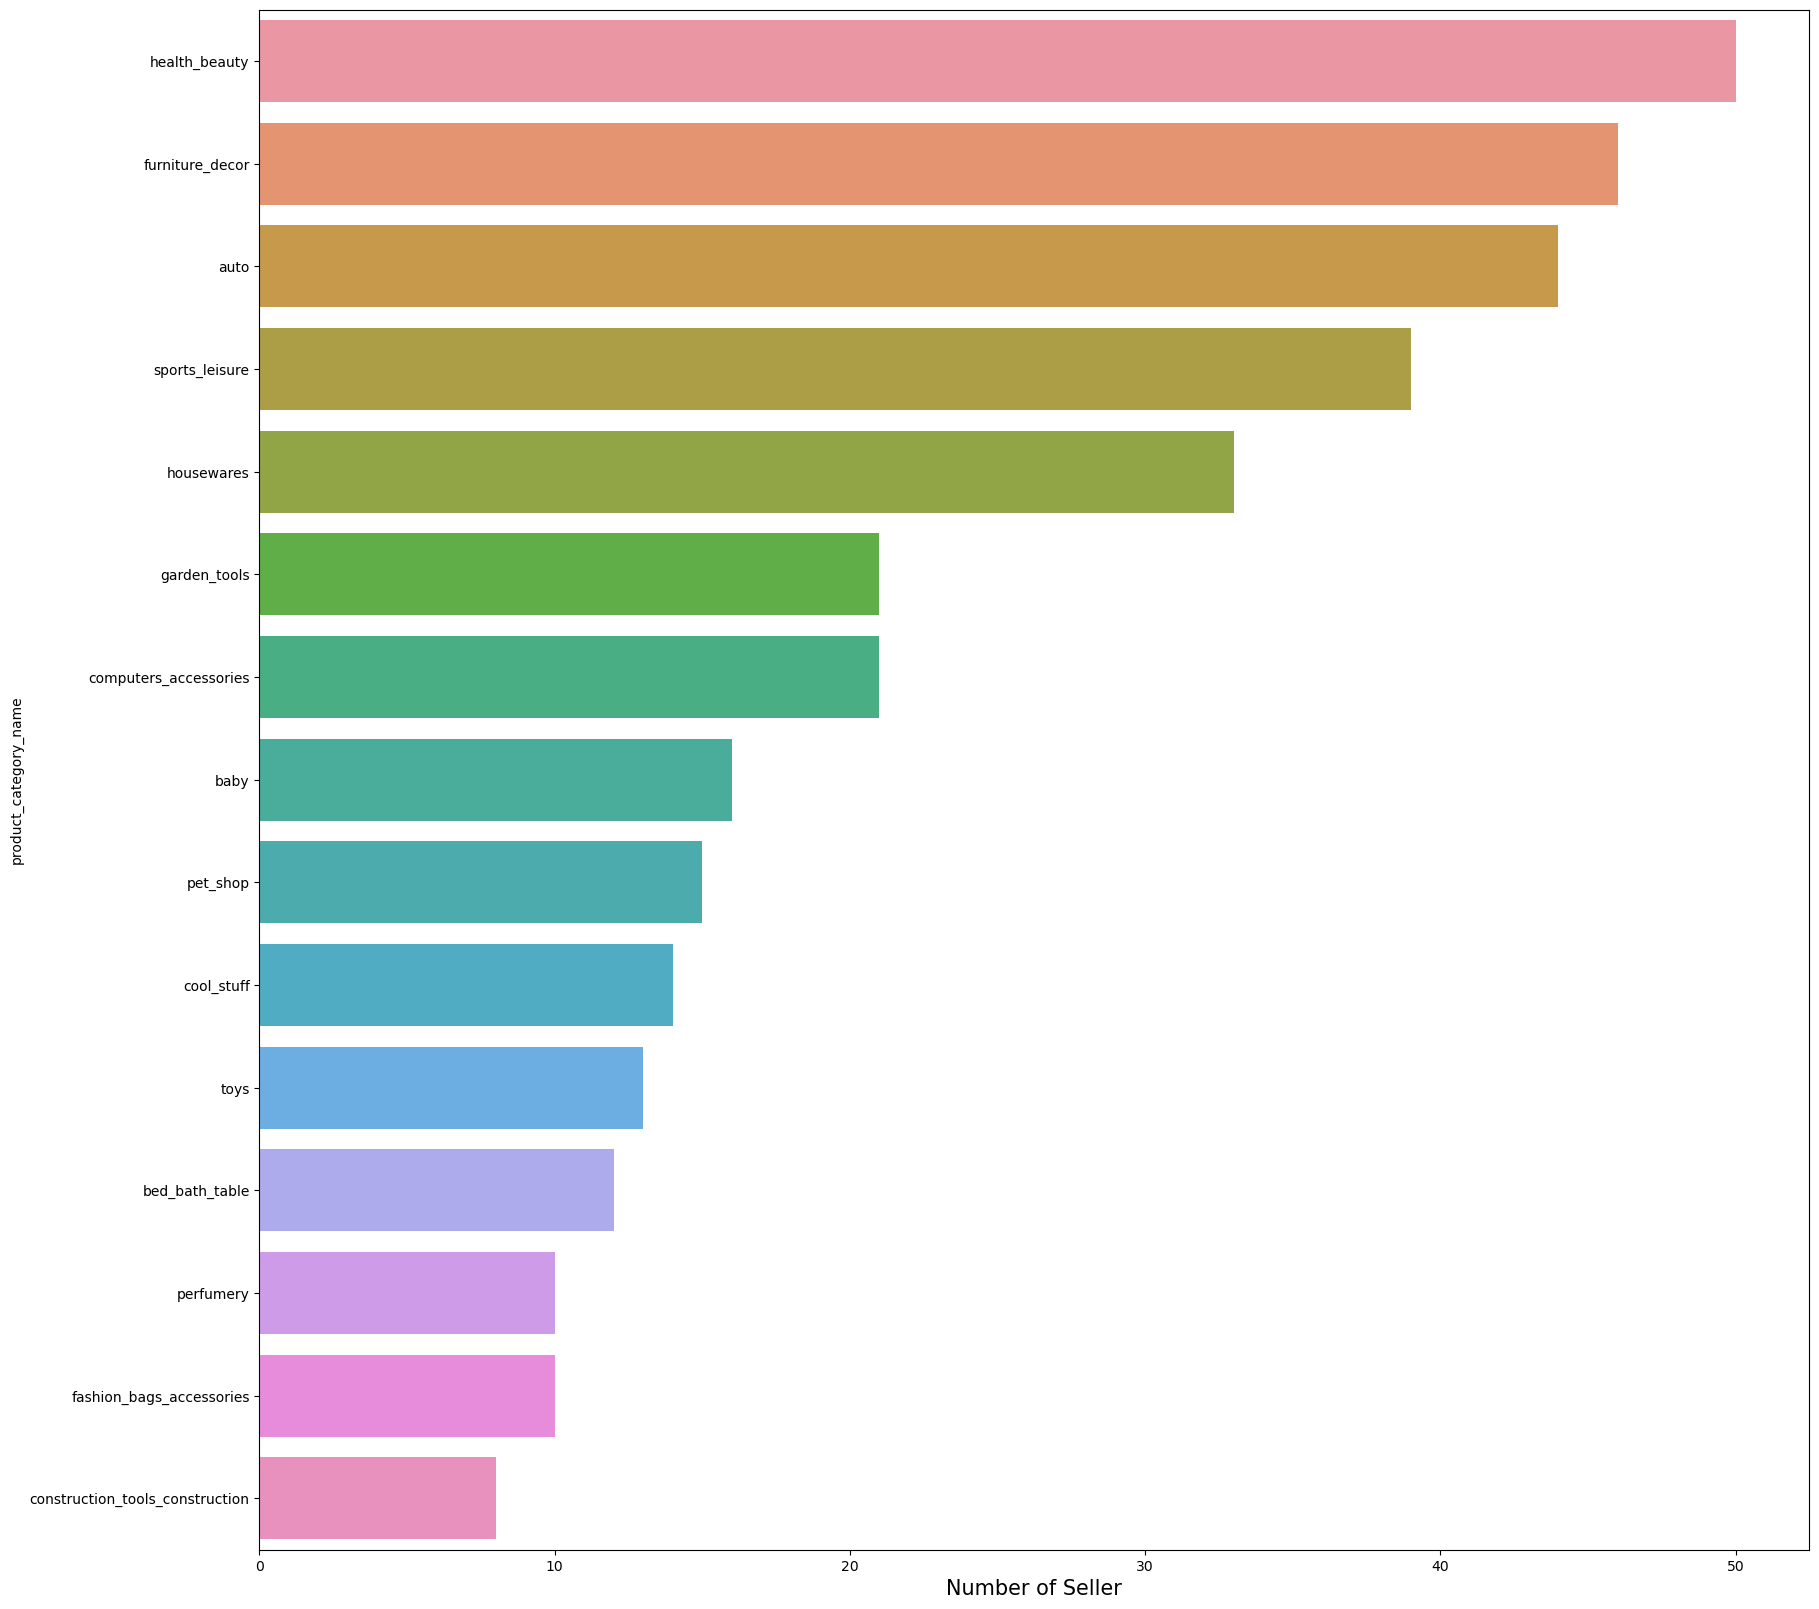

In [ ]:
plt.figure(figsize=(20, 20))
sns.barplot(data=bottom_num_sellers_2.head(15), x='seller_id', y='product_category_name')
plt.xlabel('Product Categories', fontsize = 15)
plt.xlabel('Number of Seller', fontsize = 15)
plt.show()

### top vs. bottom

#### Average Price 

In [ ]:
top_avg_revenue_2 = top_num_order['price'].sum() / 500
top_avg_revenue_2

20028.25146

In [ ]:
top_avg_num_order_2 = top_num_order['order_id'].sum() / 500
top_avg_num_order_2

185.106

In [ ]:
top_avg_price_2 = top_avg_revenue_2 / top_avg_num_order_2
top_avg_price_2

108.19882370101456

In [ ]:
bottom_avg_revenue_2 = bottom_num_order['price'].sum() / 500
bottom_avg_revenue_2

242.39074

In [ ]:
bottom_avg_num_order_2 = bottom_num_order['order_id'].sum() / 500
bottom_avg_num_order_2

1.036

In [ ]:
bottom_avg_price_2 = bottom_avg_revenue_2 / bottom_avg_num_order_2
bottom_avg_price_2

233.96789575289574

In [ ]:
# top seller 와 bottom seller들의 평균 카테고리수 비교 시각화
top_bottom_price_2 = pd.DataFrame({'top_bottom' : ['top_seller_avg', 'bottom_seller_avg'], 'average' : [top_avg_price_2, bottom_avg_price_2]})
top_bottom_price_2

,top_bottom,average
0,top_seller_avg,108.198824
1,bottom_seller_avg,233.967896


<AxesSubplot:xlabel='top_bottom', ylabel='average'>

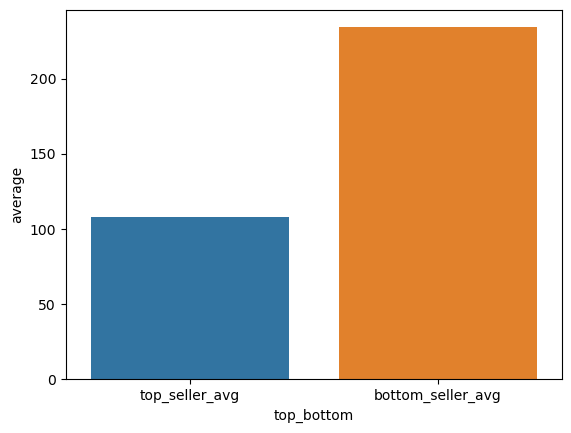

In [ ]:
sns.barplot(data=top_bottom_price_2, x='top_bottom', y='average')

#### Average Number of Categories

In [ ]:
top_avg_2 = seller_category_top_df_2['num_of_categories'].sum() / 500
top_avg_2

4.198

In [ ]:
bottom_avg_2 = seller_category_bottom_df_2['num_of_categories'].sum() / 500
bottom_avg_2

0.952

In [ ]:
# top seller 와 bottom seller들의 평균 카테고리수 비교 시각화
top_bottom_2 = pd.DataFrame({'top_bottom' : ['top_seller_avg', 'bottom_seller_avg'], 'average' : [top_avg_2, bottom_avg_2]})
top_bottom_2

,top_bottom,average
0,top_seller_avg,4.198
1,bottom_seller_avg,0.952


<AxesSubplot:xlabel='top_bottom', ylabel='average'>

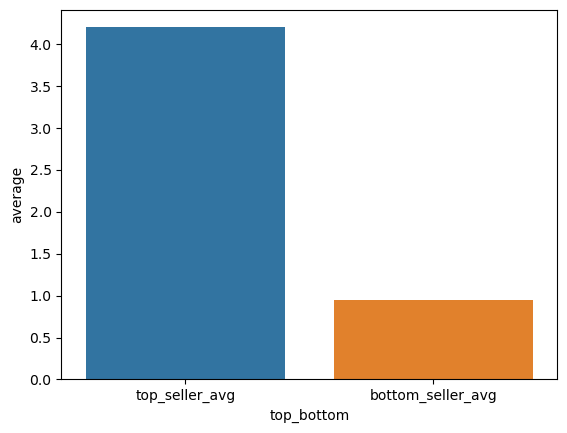

In [ ]:
sns.barplot(data=top_bottom_2, x='top_bottom', y='average')

## Number of Categories by Sellers

In [ ]:
df_num_order.shape[0]

3056

In [ ]:
df_all = pd.DataFrame()
df_all = orders.merge(order_items, on='order_id', how='outer')
df_all = df_all.merge(order_payments, on='order_id', how='outer')
df_all = df_all.merge(order_reviews, on='order_id', how='outer')
df_all = df_all.merge(olist_sellers, on='seller_id', how='outer')
df_all = df_all.merge(olist_products, on='product_id', how='outer')

df_all = df_all[['order_id', 'customer_id', 'order_status', 'product_id', 'order_item_id', 
                 'seller_id', 'review_score', 'product_category_name', 'price']]

df_num_order = pd.DataFrame(df_all.groupby('seller_id', as_index=False).agg({'price' : 'sum', 'order_id' : 'count'})).sort_values('order_id', ascending=False)

seller_cat_dict_top = {}
for i in range(df_num_order.shape[0]):
    seller = df_num_order['seller_id'][i]
    seller_cat_dict_top[seller] = df_all[df_all['seller_id'] == seller].value_counts('product_category_name').index.values

seller_category_top_df = pd.DataFrame(list(seller_cat_dict_top.items()), columns=['seller_id', 'product_categories'])
seller_category_top_df['num_of_categories'] = seller_category_top_df['product_categories'].map(lambda x: len(x))

In [ ]:
seller_category_top_df

,seller_id,product_categories,num_of_categories
0,0015a82c2db000af6aaaf3ae2ecb0532,[eletroportateis],1
1,001cca7ae9ae17fb1caed9dfb1094831,"[ferramentas_jardim, construcao_ferramentas_co...",2
2,001e6ad469a905060d959994f1b41e4f,[esporte_lazer],1
3,002100f778ceb8431b7a1020ff7ab48f,[moveis_decoracao],1
4,003554e2dce176b5555353e4f3555ac8,[],0
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,[livros_interesse_geral],1
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,"[utilidades_domesticas, moveis_decoracao]",2
3092,ffeee66ac5d5a62fe688b9d26f83f534,[eletrodomesticos],1
3093,fffd5413c0700ac820c7069d66d98c89,"[utilidades_domesticas, moveis_decoracao, move...",3
